In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import mplhep as hep
import numpy as np
import matplotlib.colors as mcolors
from iminuit import Minuit, cost
from iminuit.cost import LeastSquares
from scipy.ndimage import convolve
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

In [2]:
input_file_name = 'data/WScFi4GeV4degrees.pkl'

with open(input_file_name, 'rb') as file:
    dataframes_dict = pickle.load(file)

In [3]:
def least_squares_loss(A, mu, sigma):
    y = gauss(bins, A, mu, sigma)
    return np.sum((data - y)**2)

def gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))
towers = [9, 10, 5, 6]

482888


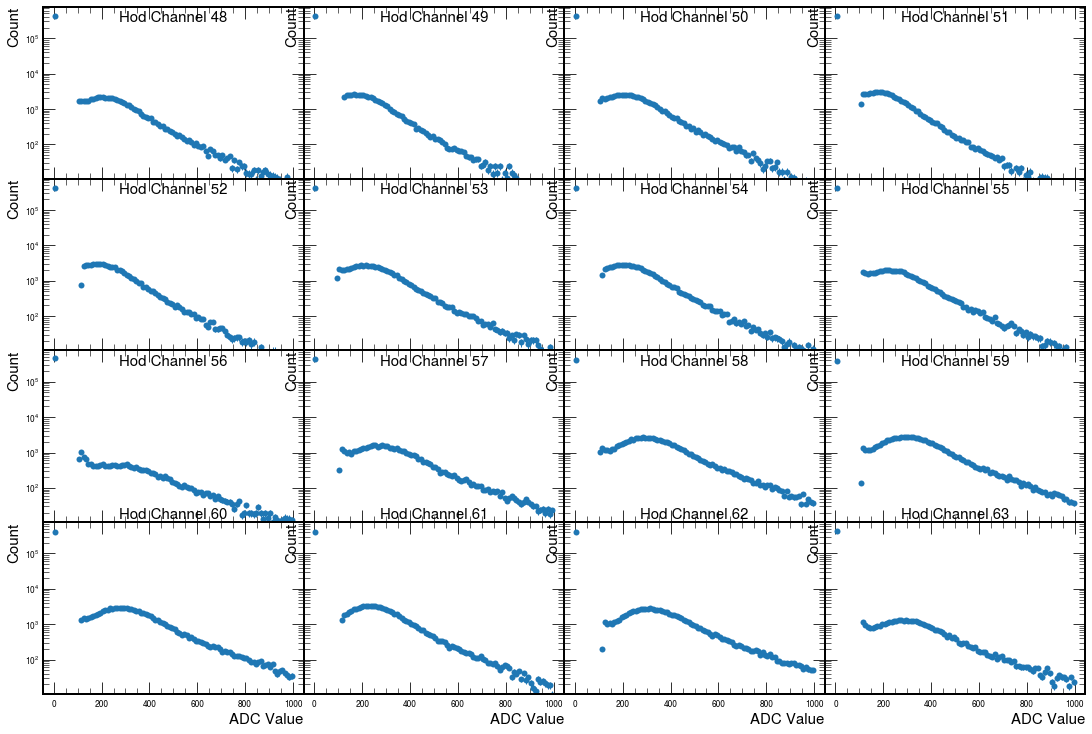

In [4]:
# Plot ADC spectra for each channel in subplots
fig, axes = plt.subplots(4, 4, figsize=(15, 10), sharey=True,sharex=True)
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'


# Flatten the axes for easy iteration
axes = axes.flatten()
hod_df = dataframes_dict['hod_df']
hod_rms = []
# Iterate over each channel
for i in range(16):
    # Select the ADC values for the channel
    adc_values = hod_df[f'ch_{i + 48}']  # Adjusted to start from ch_48
    hod_rms.append(np.std(adc_values))

    
    h, bins = np.histogram(adc_values, bins=100, range=(0, 1000))
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    errors = np.sqrt(h)
    axes[i].errorbar(bin_centers, h, yerr=errors, fmt='o', ecolor='tab:blue', color='tab:blue', capsize=0, elinewidth=1, markeredgewidth=0)
    
    axes[i].set_title(f'Hod Channel {i + 48}', fontsize = 15, pad=-15)  # Adjusted channel title
    axes[i].set_xlabel('ADC Value', fontsize = 15)
    axes[i].set_ylabel('Count', fontsize = 15)
    axes[i].set_yscale('log')

print(len(hod_df['ch_48']))
plt.tight_layout(pad=0.0)
plt.subplots_adjust(hspace=0.0, wspace=0.0)

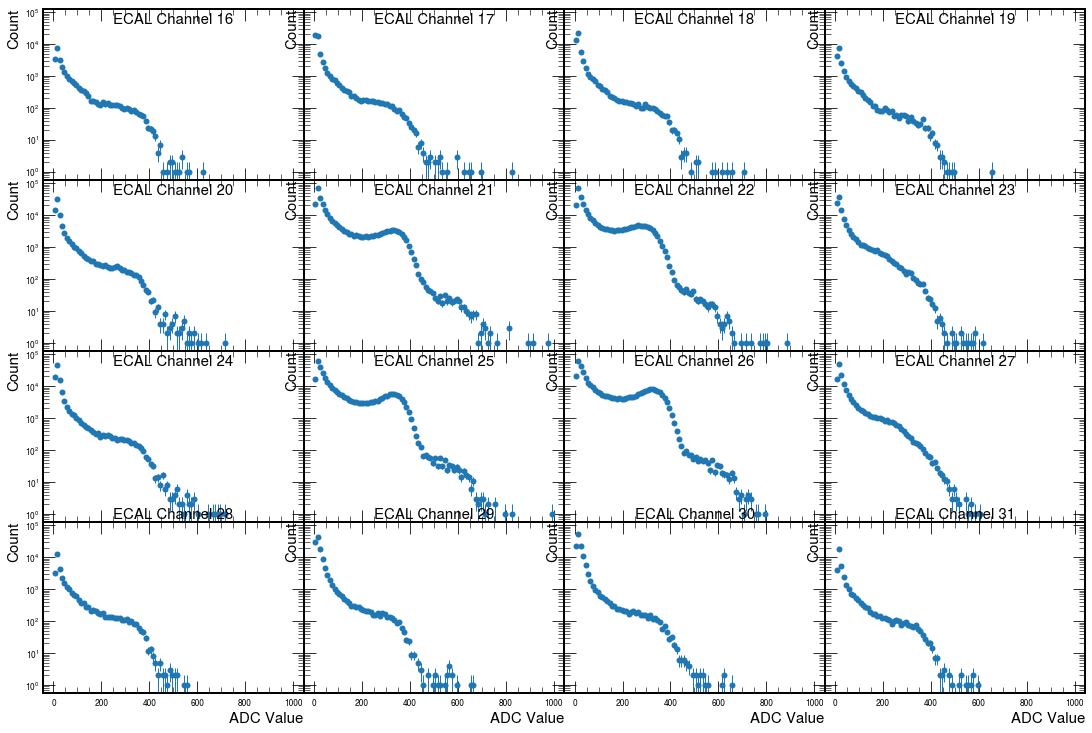

In [5]:
# Plot ADC spectra for each channel in subplots
fig, axes = plt.subplots(4, 4, figsize=(15, 10), sharey=True,sharex=True)
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

ecal_df = dataframes_dict['ecal_df']

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over each channel
for i in range(16):
    # Select the ADC values for the channel
    adc_values = ecal_df[f'ch_{i + 16}']  # Adjusted to start from ch_48

    
    h, bins = np.histogram(adc_values, bins=100, range=(1, 1000))
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    errors = np.sqrt(h)
    axes[i].errorbar(bin_centers, h, yerr=errors, fmt='o', ecolor='tab:blue', color='tab:blue', capsize=0, elinewidth=1, markeredgewidth=0)
    
    
    axes[i].set_title(f'ECAL Channel {i + 16}', fontsize = 15, pad=-15)  # Adjusted channel title
    axes[i].set_xlabel('ADC Value', fontsize = 15)
    axes[i].set_ylabel('Count', fontsize = 15)
    axes[i].set_yscale('log')

plt.tight_layout(pad=0.0)
plt.subplots_adjust(hspace=0.0, wspace=0.0)

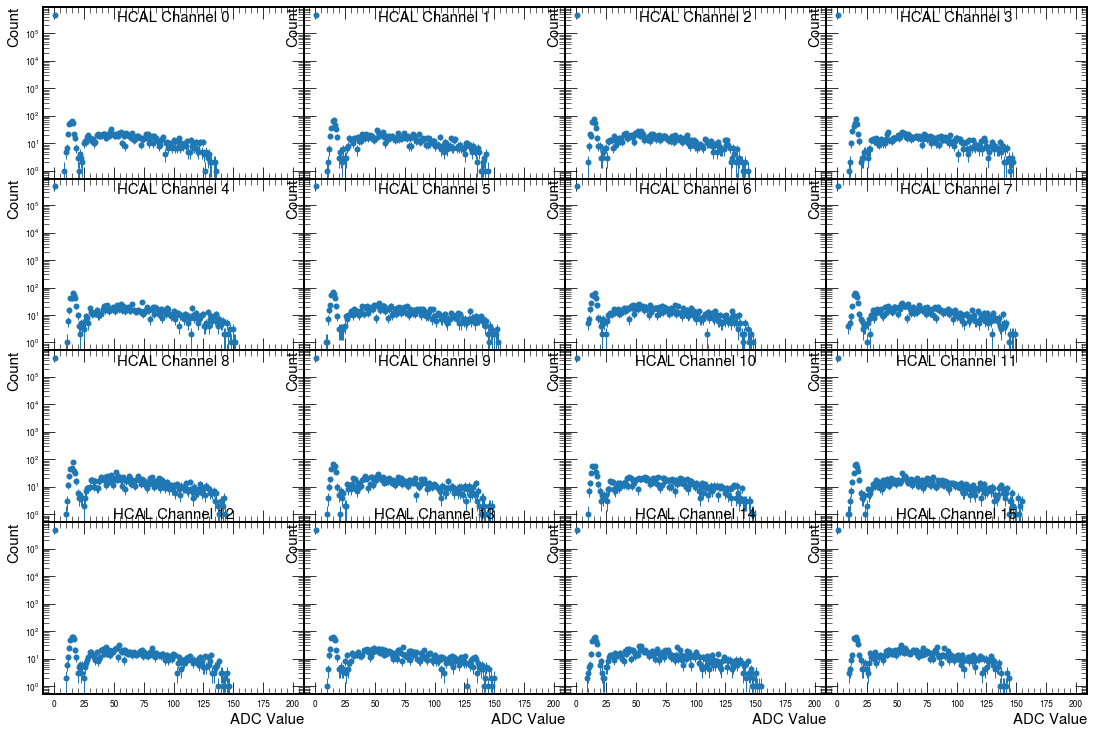

In [6]:
# Plot ADC spectra for each channel in subplots
fig, axes = plt.subplots(4, 4, figsize=(15, 10), sharey=True,sharex=True)
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

hcal_df = dataframes_dict['hcal_df']

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over each channel
for i in range(16):
    # Select the ADC values for the channel
    adc_values = hcal_df[f'ch_{i}']  # Adjusted to start from ch_48
    h, bins = np.histogram(adc_values, bins=200, range=(0, 200))
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    errors = np.sqrt(h)
    axes[i].errorbar(bin_centers, h, yerr=errors, fmt='o', ecolor='tab:blue', color='tab:blue', capsize=0, elinewidth=1, markeredgewidth=0)
    
    
    axes[i].set_title(f'HCAL Channel {i}', fontsize = 15, pad=-15)  # Adjusted channel title
    axes[i].set_xlabel('ADC Value', fontsize = 15)
    axes[i].set_ylabel('Count', fontsize = 15)
    axes[i].set_yscale('log')

plt.tight_layout(pad=0.0)
plt.subplots_adjust(hspace=0.0, wspace=0.0)

In [7]:
# Select ADC values for all channels
adc_values = hod_df[[f'ch_{i + 48}' for i in range(16)]].values

# Calculate y multiplicity
ymult = np.sum(adc_values[:, :8] > 0, axis=1)
#HighHodHit = np.any(adc_values[:, :8] > 2275, axis=1)

# Calculate x multiplicity
xmult = np.sum(adc_values[:, 8:] > 0, axis=1)
#HighHodHit |= np.any(adc_values[:, 8:] > 2275, axis=1)

# Calculate x and y positions
x_positions = []
y_positions = []

xpos_evt = []
ypos_evt = []

xpos = 100
ypos = 100
for evt in range(len(hod_df['ch_48'])):
    xpos = 100
    ypos = 100
    for i in range(8):
        if hod_df[f'ch_{i + 48}'][evt] > 0:
            for j in range(8):
                #hodoscope cutoff here
                if hod_df[f'ch_{j + 48 + 8}'][evt] > 0:
                    x_positions.append(16.8 - 4.8 * j)
                    y_positions.append(-16.8 + 4.8 * i)
                    xpos = 16.8 - 4.8 * j
                    ypos = -16.8 + 4.8 * i
    xpos_evt.append(xpos)
    ypos_evt.append(ypos)

# Convert x_positions and y_positions to ndarray
if x_positions is not None:
    x_positions = np.array(x_positions)
    y_positions = np.array(y_positions)
    xpos_evt = np.array(xpos_evt)
    ypos_evt = np.array(ypos_evt)

# Append calculated multiplicities to lists
x_multiplicity = xmult.tolist()
y_multiplicity = ymult.tolist()

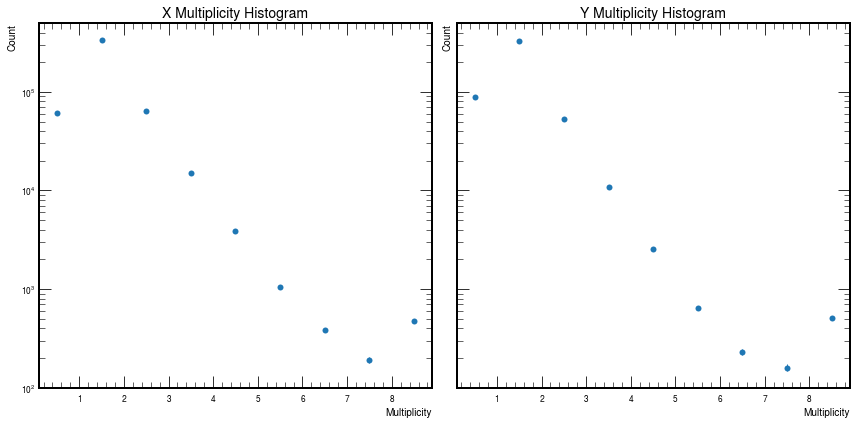

In [8]:
# Calculate histograms for x and y multiplicities
x_hist, x_bins = np.histogram(x_multiplicity, bins=9, range=(0, 9))
y_hist, y_bins = np.histogram(y_multiplicity, bins=9, range=(0, 9))
x_bin_centers = 0.5 * (x_bins[:-1] + x_bins[1:])
y_bin_centers = 0.5 * (y_bins[:-1] + y_bins[1:])
x_errors = np.sqrt(x_hist)
y_errors = np.sqrt(y_hist)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True,sharex=True)

# Plot x multiplicity histogram
ax1.errorbar(x_bin_centers, x_hist, yerr=x_errors, fmt='o', ecolor='tab:blue', color='tab:blue', capsize=0, elinewidth=1, markeredgewidth=0)
ax1.set_title('X Multiplicity Histogram', fontsize = 14)
ax1.set_xlabel('Multiplicity')
ax1.set_ylabel('Count')
ax1.set_yscale('log')

# Plot y multiplicity histogram
ax2.errorbar(y_bin_centers, y_hist, yerr=y_errors, fmt='o', ecolor='tab:blue', color='tab:blue', capsize=0, elinewidth=1, markeredgewidth=0)
ax2.set_title('Y Multiplicity Histogram', fontsize = 14)
ax2.set_xlabel('Multiplicity')
ax2.set_ylabel('Count')
ax2.set_yscale('log')

plt.tight_layout()

In [9]:
# Define objects like "PbGlassRawSpectrum" as lists
PbGlassRawSpectrum = []
PbGlassHodCuts = []
PbGlassCkovHodCuts = []
PbGlassCkovHodPosCuts = []
hodmult = []
ckovinnerhit = []
ckovouternohit = []
positioncut = []

# Boolean conditions
hodmult = (xmult == 1) & (ymult == 1)

ckovinnerhit = (dataframes_dict['ce1_df']['ch_35'] > 0)
ckovouternohit = (dataframes_dict['ce2_df']['ch_37'] == 0)
size = 1

positioncut = (-9.6*size < xpos_evt) & (xpos_evt < 9.6*size) & (-9.6*size < ypos_evt) & (ypos_evt < 9.6*size)

# Make Pb Glass Hists
PbGlassRawSpectrum.append(dataframes_dict['pbg_df']['ch_34'])
PbGlassHodCuts.append(dataframes_dict['pbg_df']['ch_34'][hodmult])
CkovHodCuts = hodmult & ckovinnerhit & ckovouternohit
PbGlassCkovHodCuts.append(dataframes_dict['pbg_df']['ch_34'][CkovHodCuts])
CkovHodPosCuts = hodmult & ckovinnerhit & ckovouternohit & positioncut
PbGlassCkovHodPosCuts.append(dataframes_dict['pbg_df']['ch_34'][CkovHodPosCuts])

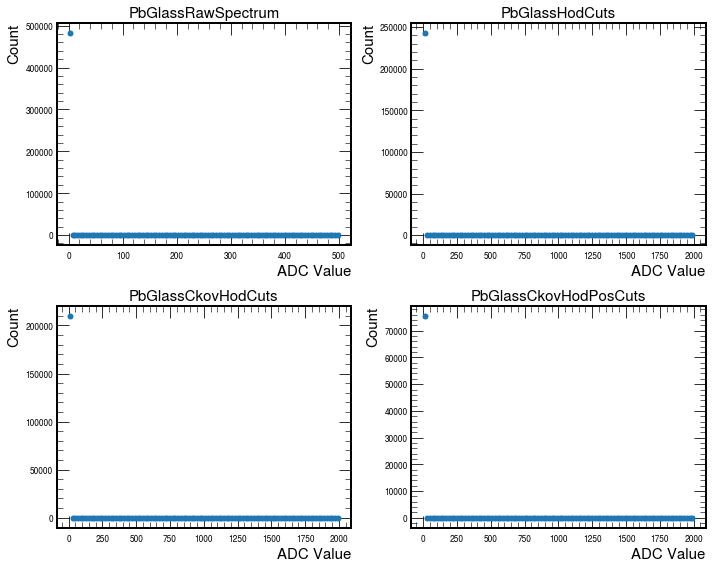

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Define bins and ranges for each histogram
bins_ranges = {
    'PbGlassRawSpectrum': (100, (0, 500)),
    'PbGlassHodCuts': (100, (0, 2000)),
    'PbGlassCkovHodCuts': (100, (0, 2000)),
    'PbGlassCkovHodPosCuts': (100, (0, 2000))
}

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot histograms
for i, (label, data) in enumerate([
    ('PbGlassRawSpectrum', PbGlassRawSpectrum),
    ('PbGlassHodCuts', PbGlassHodCuts),
    ('PbGlassCkovHodCuts', PbGlassCkovHodCuts),
    ('PbGlassCkovHodPosCuts', PbGlassCkovHodPosCuts)
]):
    # Get bins and range for current histogram
    bins, range_ = bins_ranges[label]
    
    # Calculate histogram
    hist, bins_edges = np.histogram(data,bins, range_)
    bin_centers = 0.5 * (bins_edges[:-1] + bins_edges[1:])
    
    # Determine subplot position
    row = i // 2
    col = i % 2
    
    # Plot histogram
    axs[row, col].errorbar(bin_centers, hist, fmt='o', ecolor='tab:blue', color='tab:blue', capsize=0, elinewidth=1, markeredgewidth=0)
    axs[row, col].set_title(label, fontsize=15)
    axs[row, col].set_xlabel('ADC Value', fontsize=15)
    axs[row, col].set_ylabel('Count', fontsize=15)
    #axs[row, col].set_yscale('log')

# Adjust layout
plt.tight_layout()
plt.show()


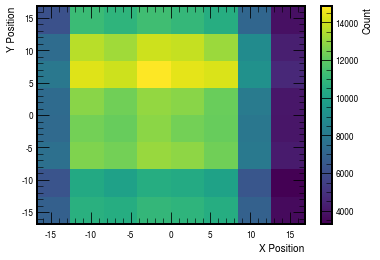

In [11]:
x_range = (-20.5, 20.5)  # Specify your desired x range
y_range = (-20.5, 20.5)  # Specify your desired y range

plt.hist2d(x_positions, y_positions, bins=(8,8), cmap='viridis',range=np.array([(-16.8, 16.8), (-16.8, 16.8)]))
plt.xlabel("X Position")
plt.ylabel("Y Position")
plt.colorbar(label="Count")
#plt.clim(0,1000)

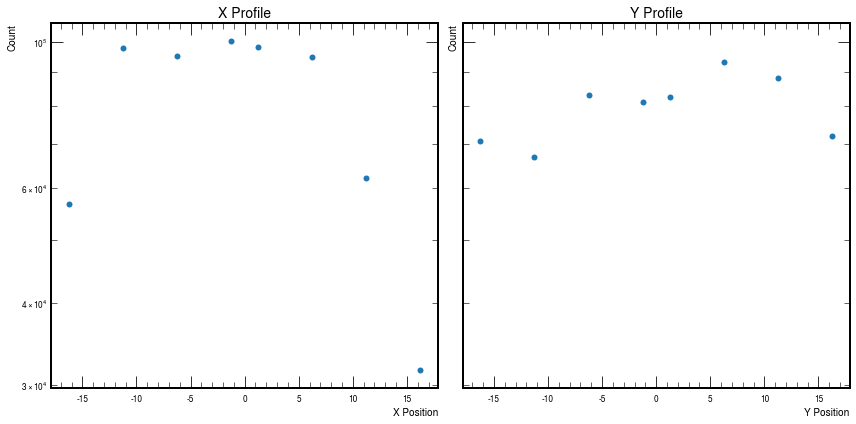

In [12]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

# Calculate histograms for x and y multiplicities
x_hist, x_bins = np.histogram(x_positions, bins=20, range=(-25, 25))
y_hist, y_bins = np.histogram(y_positions, bins=20, range=(-25, 25))

xmask = x_hist > 0
ymask = y_hist > 0

x_bin_centers = 0.5 * (x_bins[:-1] + x_bins[1:])
y_bin_centers = 0.5 * (y_bins[:-1] + y_bins[1:])
x_errors = np.sqrt(x_hist)
y_errors = np.sqrt(y_hist)

x_hist = np.array(x_hist)[xmask]
y_hist = np.array(y_hist)[ymask]
x_bin_centers = np.array(x_bin_centers)[xmask]
y_bin_centers = np.array(y_bin_centers)[ymask]
x_errors = np.array(x_errors)[xmask]
y_errors = np.array(y_errors)[ymask]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True,sharex=True)

# Plot x multiplicity histogram
ax1.errorbar(x_bin_centers, x_hist, yerr=x_errors, fmt='o', ecolor='tab:blue', color='tab:blue', capsize=0, elinewidth=1, markeredgewidth=0)
ax1.set_title('X Profile', fontsize = 14)
ax1.set_xlabel('X Position')
ax1.set_ylabel('Count')
ax1.set_yscale('log')

# Plot y multiplicity histogram
ax2.errorbar(y_bin_centers, y_hist, yerr=y_errors, fmt='o', ecolor='tab:blue', color='tab:blue', capsize=0, elinewidth=1, markeredgewidth=0)
ax2.set_title('Y Profile', fontsize = 14)
ax2.set_xlabel('Y Position')
ax2.set_ylabel('Count')
ax2.set_yscale('log')

plt.tight_layout()

In [13]:
HCalRawADCSpectrum = []
for i in range(16):
    HCalRawADCSpectrum.extend(dataframes_dict['hcal_df'][f'ch_{i}'])
ECalRawADCSpectrum = []
for i in range(16):
    ECalRawADCSpectrum.extend(dataframes_dict['ecal_df'][f'ch_{i+16}'])
HodRawADCSpectrum = []
for i in range(16):
    HodRawADCSpectrum.extend(dataframes_dict['hod_df'][f'ch_{i+48}'])
    
Sc1RawADCSpectrum = dataframes_dict['sc1_df']['ch_32']
MonRawADCSpectrum = dataframes_dict['mon_df']['ch_33']
Ce1RawADCSpectrum = dataframes_dict['ce1_df']['ch_35']
Ce2RawADCSpectrum = dataframes_dict['ce2_df']['ch_37']
PbGRawADCSpectrum = dataframes_dict['pbg_df']['ch_34']

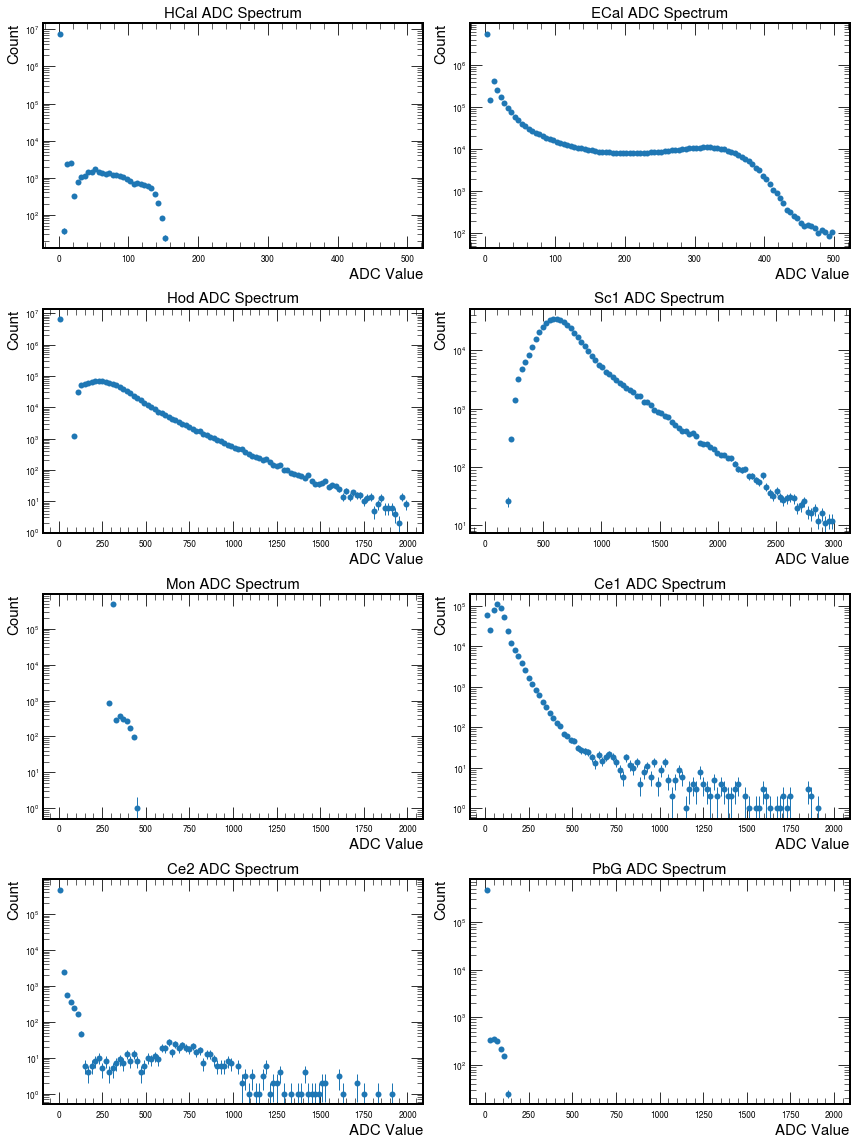

In [14]:
# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
axes = axes.ravel()

list_names = ['HCal ADC Spectrum', 'ECal ADC Spectrum', 'Hod ADC Spectrum',
              'Sc1 ADC Spectrum', 'Mon ADC Spectrum', 'Ce1 ADC Spectrum',
              'Ce2 ADC Spectrum', 'PbG ADC Spectrum']
bins_ranges = {
    'HCal ADC Spectrum': (100, (0, 500)),
    'ECal ADC Spectrum': (100, (0, 500)),
    'Hod ADC Spectrum': (100, (0, 2000)),
    'Sc1 ADC Spectrum': (100, (0, 3000)),
    'Mon ADC Spectrum': (100, (0, 2000)),
    'Ce1 ADC Spectrum': (100, (0, 2000)),
    'Ce2 ADC Spectrum': (100, (0, 2000)),
    'PbG ADC Spectrum': (100, (0, 2000))
}

# Loop through the lists and create histograms
for i, spectrum in enumerate([HCalRawADCSpectrum, ECalRawADCSpectrum, HodRawADCSpectrum,
                              Sc1RawADCSpectrum, MonRawADCSpectrum, Ce1RawADCSpectrum,
                              Ce2RawADCSpectrum, PbGRawADCSpectrum]):
    bins, range_ = bins_ranges[str(list_names[i])]
    h, bins = np.histogram(spectrum, bins=bins, range=range_)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    errors = np.sqrt(h)
    axes[i].errorbar(bin_centers, h, yerr=errors, fmt='o', ecolor='tab:blue', color='tab:blue',
                      capsize=0, elinewidth=1, markeredgewidth=0)
    axes[i].set_title(list_names[i], fontsize = 15)
    axes[i].set_yscale('log')
    axes[i].set_ylabel("Count", fontsize = 15)
    axes[i].set_xlabel("ADC Value", fontsize = 15)

# Add labels and title
fig.tight_layout()

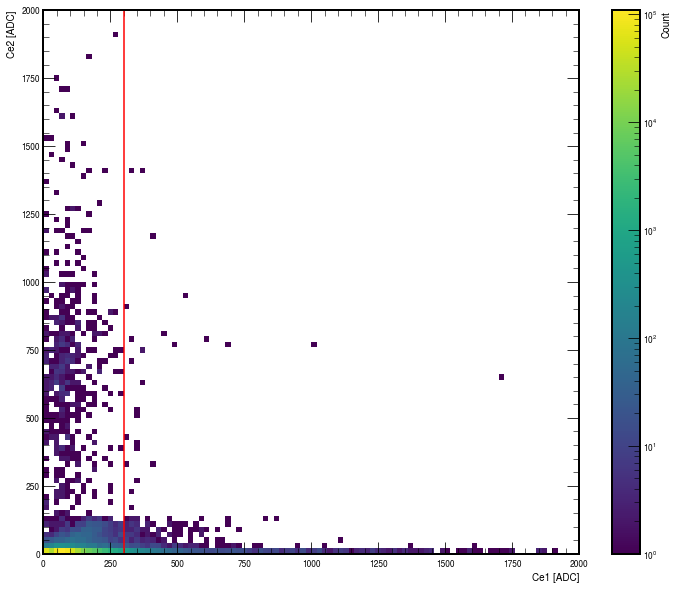

In [15]:
fig, axs = plt.subplots(1, 1, figsize=(12, 10))
plt.hist2d(Ce1RawADCSpectrum, Ce2RawADCSpectrum, bins=(100,100), cmap='viridis',range=np.array([(0, 2000), (0, 2000)]), norm=mcolors.LogNorm())
plt.colorbar(label="Count")
plt.xlabel("Ce1 [ADC]")
plt.ylabel("Ce2 [ADC]")
    
plt.axvline(x=300, color='red')

In [16]:
ECalSumHist = []
ECalMultiplicityHist = []
ECalSumElectron = []
ECalMultiplicityElectron = []
PbGElectron = []

HodXElectron = []
HodYElectron = []

ElectronEcalCh = [[] for i in range(16)]

ecutMask = []

for evt in range(len(hod_df['ch_48'])):

    ecut = (Sc1RawADCSpectrum[evt] < 1000) & (xmult[evt]==1) & (ymult[evt]==1) & (Ce1RawADCSpectrum[evt] > 0) & (Ce1RawADCSpectrum[evt] < 300) & (Ce2RawADCSpectrum[evt] == 0)
    ecut_pos = ecut & positioncut[evt]
    ECalMultiplicity = 0
    ECalSum = 0
    
    for i in range(16):
        ECalCh = dataframes_dict['ecal_df'][f'ch_{i+16}'][evt] 
        
        ECalSum = ECalSum + ECalCh

        if ECalCh > 10:
            ECalMultiplicity = ECalMultiplicity + 1
            
            
    ECalSumHist.append(ECalSum)
    ECalMultiplicityHist.append(ECalMultiplicity)

    if ecut & (ECalMultiplicity >= 3):
        ecutMask.append(True)
    else:
        ecutMask.append(False)
    if ecut_pos:
        PbGElectron.append(PbGRawADCSpectrum[evt])

PbGElectron = np.array(PbGElectron)  

In [17]:
HodXElectron = np.array(xpos_evt)[ecutMask]
HodYElectron = np.array(ypos_evt)[ecutMask]
     
ECalSumHist = np.array(ECalSumHist)
ECalMultiplicityHist = np.array(ECalMultiplicityHist)
ECalSumElectron = ECalSumHist[ecutMask]
ECalMultiplicityElectron = ECalMultiplicityHist[ecutMask]

ElectronEcalCh = [[] for i in range(16)]
for evt in range(len(dataframes_dict['ecal_df'][f'ch_{16}'])):
    if ecutMask[evt]:
        for i in range(16):
            ECalCh = dataframes_dict['ecal_df'][f'ch_{i+16}'][evt]
            ElectronEcalCh[i].append(ECalCh)

69529
Mean: nan
Mean Error: nan
Resolution: nan
Resolution Error: nan


/Users/spreins/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/spreins/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/spreins/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/Users/spreins/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/Users/spreins/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 1, 'Count')

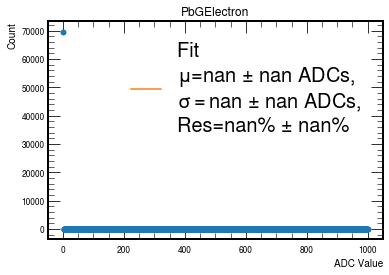

In [18]:
lowRange = 0
highRange = 1000
bins = 800
lowFit = 0
highFit = 1000

h, bins = np.histogram(PbGElectron, bins=bins, range=(lowRange,highRange))
bin_centers = 0.5 * (bins[:-1] + bins[1:])
errors = np.sqrt(h)
plt.errorbar(bin_centers, h, yerr=errors, fmt='o', ecolor='tab:blue', color='tab:blue',
                      capsize=0, elinewidth=1, markeredgewidth=0)

mask = (h > 0) & (bin_centers > lowFit) & (bin_centers < highFit)

initial_params = [max(h[mask]),np.mean(PbGElectron[PbGElectron > lowFit]),np.std(PbGElectron[PbGElectron > lowFit])]

m = Minuit(LeastSquares(bin_centers[mask], h[mask], errors[mask], gauss), A=initial_params[0], mu=initial_params[1], sigma=initial_params[2])
m.limits["sigma"] = (0, None)
m.migrad()
fitted_params = m.values
errors = m.errors
A_fit = fitted_params['A']
mu_fit = fitted_params['mu']
sigma_fit = fitted_params['sigma']

A_err = errors['A']
mu_err = errors['mu']
sigma_err = errors['sigma']

x = np.linspace(lowFit, highFit, 2000)
y_fit = gauss(x, A_fit, mu_fit, sigma_fit)
res = sigma_fit/mu_fit
res = np.sqrt((100*res)**2 - 1.8**2)

# Step 1: Calculate r and its error
r = sigma_fit / mu_fit
delta_r = r * np.sqrt((sigma_err / sigma_fit)**2 + (mu_err / mu_fit)**2)

# Step 2: Calculate s and its error
s = 100 * r
delta_s = 100 * delta_r

# Step 3: Calculate res and its error
res = np.sqrt(s**2 - 1.8**2)
delta_res = (s / np.sqrt(s**2 - 1.8**2)) * delta_s

plt.plot(x, y_fit, 'tab:orange', label='Fit \n$\mu$=%2.1f ± %2.1f ADCs, \n$\sigma=$%2.3f ± %2.1f ADCs, \nRes=%2.2f%% ± %2.1f%%'%(mu_fit, mu_err, sigma_fit, sigma_err, res, delta_res))
plt.legend(loc='upper right', fontsize=20)   

print(len(PbGElectron))
print("Mean: " + str(mu_fit))
print("Mean Error: " + str(mu_err))
print("Resolution: " + str(res))
print("Resolution Error: " + str(delta_res))
plt.title("PbGElectron")
plt.xlabel("ADC Value")
plt.ylabel("Count")

Mean: 413.1717161214895
Mean Error: 0.07113730637472693
Resolution: 9.879963663809994
Resolution Error: 0.01531954078124159


Text(0, 1, 'Count')

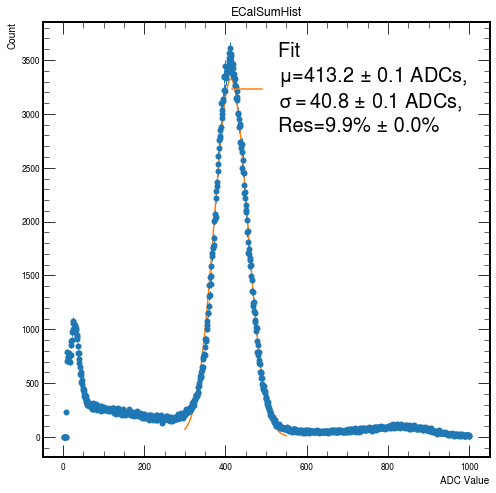

In [19]:
fig = plt.subplots(1, 1, figsize=(8, 8))

lowRange = 1
highRange = 1001
bins = 1000
lowFit = 300
highFit = 550


h, bins = np.histogram(ECalSumHist, bins=bins, range=(lowRange,highRange))
bin_centers = 0.5 * (bins[:-1] + bins[1:])
errors = np.sqrt(h)
plt.errorbar(bin_centers, h, yerr=errors, fmt='o', ecolor='tab:blue', color='tab:blue',
                      capsize=0, elinewidth=1, markeredgewidth=0)

mask = (h > 0) & (bin_centers > lowFit) & (bin_centers < highFit)
initial_params = [max(h[mask]),np.mean(ECalSumHist[ECalSumHist > lowFit]),np.std(ECalSumHist[ECalSumHist > lowFit])]

m = Minuit(LeastSquares(bin_centers[mask], h[mask], errors[mask], gauss), A=initial_params[0], mu=initial_params[1], sigma=initial_params[2])
m.limits["sigma"] = (0, None)
m.migrad()
fitted_params = m.values
errors = m.errors
A_fit = fitted_params['A']
mu_fit = fitted_params['mu']
sigma_fit = fitted_params['sigma']

A_err = errors['A']
mu_err = errors['mu']
sigma_err = errors['sigma']

x = np.linspace(lowFit, highFit, 2000)
y_fit = gauss(x, A_fit, mu_fit, sigma_fit)
res = sigma_fit/mu_fit
res = np.sqrt((100*res)**2 - 1.8**2)

# Step 1: Calculate r and its error
r = sigma_fit / mu_fit
delta_r = r * np.sqrt((sigma_err / sigma_fit)**2 + (mu_err / mu_fit)**2)

# Step 2: Calculate s and its error
s = 100 * r
delta_s = 100 * delta_r

# Step 3: Calculate res and its error
res = np.sqrt(s**2 - 1.8**2)
delta_res = (s / np.sqrt(s**2 - 1.8**2)) * delta_s

x = np.linspace(lowFit, highFit, 1500)
y_fit = gauss(x, A_fit, mu_fit, sigma_fit)
res = 100 * sigma_fit/mu_fit

plt.plot(x, y_fit, 'tab:orange', label='Fit \n$\mu$=%2.1f ± %2.1f ADCs, \n$\sigma=$%2.1f ± %2.1f ADCs, \nRes=%2.1f%% ± %2.1f%%'%(mu_fit, mu_err, sigma_fit, sigma_err, res, delta_res))
plt.legend(loc='upper right', fontsize=20)   

print("Mean: " + str(mu_fit))
print("Mean Error: " + str(mu_err))
print("Resolution: " + str(res))
print("Resolution Error: " + str(delta_res))

plt.title("ECalSumHist")
plt.xlabel("ADC Value")
plt.ylabel("Count")

Mean: 413.63935303109866
Mean Error: 0.09312813521752461
Resolution: 9.23948382878767
Resolution Error: 0.019364842762125124
Before Cuts: 482888
After Cuts: 170184


Text(0, 1, 'Count')

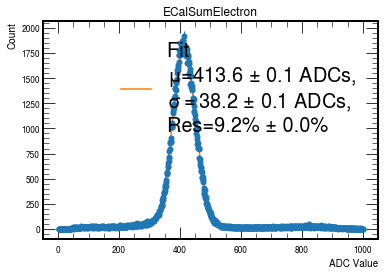

In [20]:
lowRange = 1
highRange = 1001
bins = 1000
lowFit = 300
highFit = 600


h, bins = np.histogram(ECalSumElectron, bins=bins, range=(lowRange,highRange))
bin_centers = 0.5 * (bins[:-1] + bins[1:])
errors = np.sqrt(h)
plt.errorbar(bin_centers, h, yerr=errors, fmt='o', ecolor='tab:blue', color='tab:blue',
                      capsize=0, elinewidth=1, markeredgewidth=0)

mask = (h > 0) & (bin_centers > lowFit) & (bin_centers < highFit)
initial_params = [max(h[mask]),np.mean(ECalSumElectron[ECalSumElectron > lowFit]),np.std(ECalSumElectron[ECalSumElectron > lowFit])]

m = Minuit(LeastSquares(bin_centers[mask], h[mask], errors[mask], gauss), A=initial_params[0], mu=initial_params[1], sigma=initial_params[2])
m.limits["sigma"] = (0, None)
m.migrad()
fitted_params = m.values
errors = m.errors
A_fit = fitted_params['A']
mu_fit = fitted_params['mu']
sigma_fit = fitted_params['sigma']
A_err = errors['A']
mu_err = errors['mu']
sigma_err = errors['sigma']

x = np.linspace(lowFit, highFit, 2000)
y_fit = gauss(x, A_fit, mu_fit, sigma_fit)
res = sigma_fit/mu_fit
res = np.sqrt((100*res)**2 - 1.8**2)

# Step 1: Calculate r and its error
r = sigma_fit / mu_fit
delta_r = r * np.sqrt((sigma_err / sigma_fit)**2 + (mu_err / mu_fit)**2)

# Step 2: Calculate s and its error
s = 100 * r
delta_s = 100 * delta_r

# Step 3: Calculate res and its error
res = np.sqrt(s**2 - 1.8**2)
delta_res = (s / np.sqrt(s**2 - 1.8**2)) * delta_s

x = np.linspace(lowFit, highFit, 1500)
y_fit = gauss(x, A_fit, mu_fit, sigma_fit)
res = 100 * sigma_fit/mu_fit

plt.plot(x, y_fit, 'tab:orange', label='Fit \n$\mu$=%2.1f ± %2.1f ADCs, \n$\sigma=$%2.1f ± %2.1f ADCs, \nRes=%2.1f%% ± %2.1f%%'%(mu_fit, mu_err, sigma_fit, sigma_err, res, delta_res))
plt.legend(loc='upper right', fontsize=20)   

print("Mean: " + str(mu_fit))
print("Mean Error: " + str(mu_err))
print("Resolution: " + str(res))
print("Resolution Error: " + str(delta_res))

ElectronECut = (ECalSumElectron < ( mu_fit + (3* sigma_fit))) & (ECalSumElectron > ( mu_fit - (3* sigma_fit)))

ECalMultiplicityElectron = ECalMultiplicityElectron[ElectronECut]
HodXElectron = HodXElectron[ElectronECut]
HodYElectron = HodYElectron[ElectronECut]

for i in range(16):
    ElectronEcalCh[i] = np.array(ElectronEcalCh[i])[ElectronECut]
ECalSumElectron = ECalSumElectron[ElectronECut]

print("Before Cuts: "+str(len(hod_df['ch_48'])))
print("After Cuts: "+str(len(HodXElectron)))

plt.title("ECalSumElectron")
plt.xlabel("ADC Value")
plt.ylabel("Count")

Text(0, 1, 'Count')

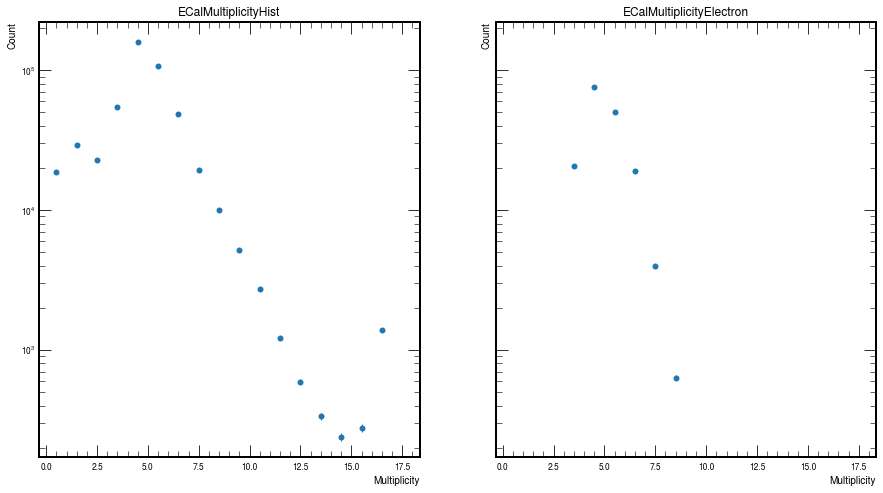

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True,sharex=True)
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

axes = axes.flatten()

h, bins = np.histogram(ECalMultiplicityHist, range=(0,18), bins=18)

bin_centers = 0.5 * (bins[:-1] + bins[1:])
errors = np.sqrt(h)
axes[0].errorbar(bin_centers, h, yerr=errors, fmt='o', ecolor='tab:blue', color='tab:blue',
                      capsize=0, elinewidth=1, markeredgewidth=0)
axes[0].set_title("ECalMultiplicityHist")
axes[0].set_yscale('log')
axes[0].set_xlabel("Multiplicity")
axes[0].set_ylabel("Count")
h, bins = np.histogram(ECalMultiplicityElectron, range=(0,18), bins=18)

bin_centers = 0.5 * (bins[:-1] + bins[1:])
errors = np.sqrt(h)
axes[1].errorbar(bin_centers, h, yerr=errors, fmt='o', ecolor='tab:blue', color='tab:blue',
                      capsize=0, elinewidth=1, markeredgewidth=0)
axes[1].set_title("ECalMultiplicityElectron")
axes[1].set_yscale('log')
axes[1].set_xlabel("Multiplicity")
axes[1].set_ylabel("Count")

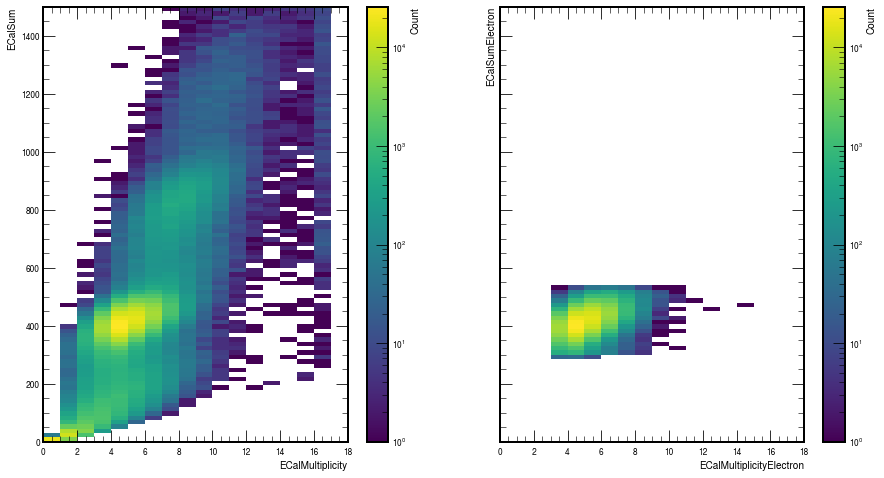

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True,sharex=True)
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

axes = axes.flatten()

h1 = axes[0].hist2d(ECalMultiplicityHist, ECalSumHist, bins=(18,100), cmap='viridis',range=np.array([(0, 18), (0, 1500)]), norm=mcolors.LogNorm())
axes[0].set_xlabel("ECalMultiplicity")
axes[0].set_ylabel("ECalSum")
fig.colorbar(h1[3], ax=axes[0], label = "Count")

h2 = axes[1].hist2d(ECalMultiplicityElectron, ECalSumElectron, bins=(18,100), cmap='viridis',range=np.array([(0, 18), (0, 1500)]), norm=mcolors.LogNorm())
axes[1].set_xlabel("ECalMultiplicityElectron")
axes[1].set_ylabel("ECalSumElectron")
fig.colorbar(h1[3], ax=axes[1],label = "Count")

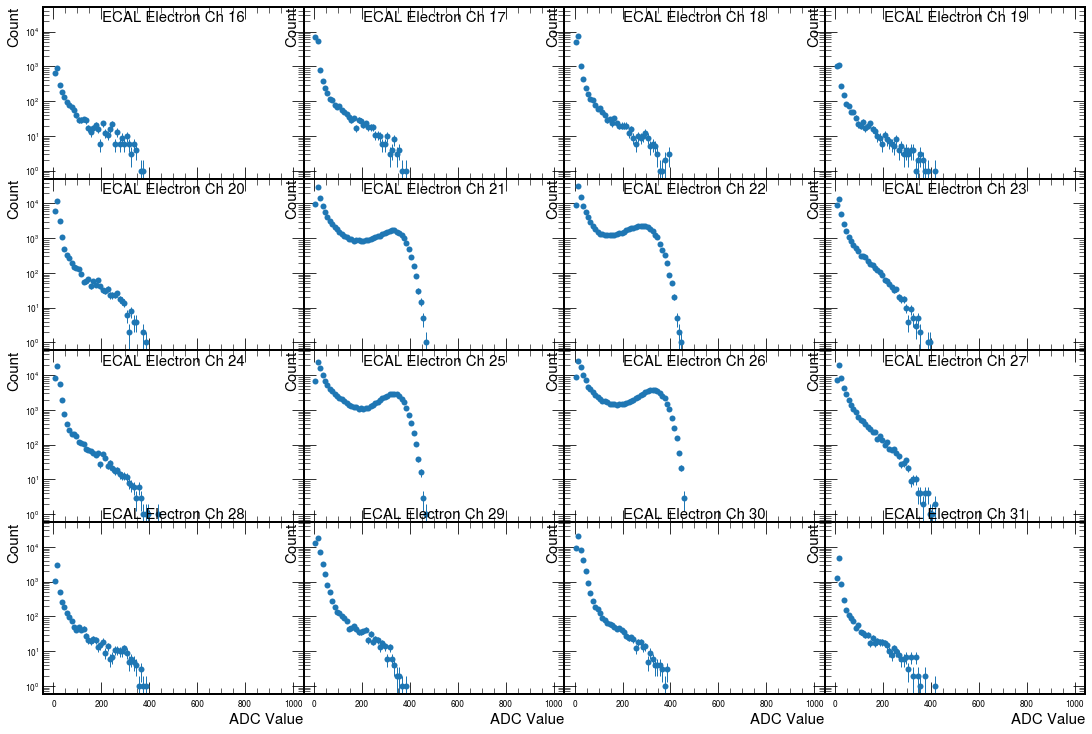

In [23]:
# Plot ADC spectra for each channel in subplots
fig, axes = plt.subplots(4, 4, figsize=(15, 10), sharey=True,sharex=True)
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

ecal_df = dataframes_dict['ecal_df']

# Flatten the axes for easy iteration
axes = axes.flatten()

# Iterate over each channel
for i in range(16):
    # Select the ADC values for the channel
    adc_values = np.array(ElectronEcalCh[i])

    
    h, bins = np.histogram(adc_values, bins=100, range=(1, 1000))
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    errors = np.sqrt(h)
    axes[i].errorbar(bin_centers, h, yerr=errors, fmt='o', ecolor='tab:blue', color='tab:blue', capsize=0, elinewidth=1, markeredgewidth=0)
    
    
    axes[i].set_title(f'ECAL Electron Ch {i + 16}', fontsize = 15, pad=-15)  # Adjusted channel title
    axes[i].set_xlabel('ADC Value', fontsize = 15)
    axes[i].set_ylabel('Count', fontsize = 15)
    axes[i].set_yscale('log')

plt.tight_layout(pad=0.0)
plt.subplots_adjust(hspace=0.0, wspace=0.0)

In [24]:
def channel_to_xy(channel):
    # Validate the channel number
    if not (0 <= channel <= 15):
        raise ValueError("Channel number must be between 0 and 15.")
        
    tower_size = 25
    
    col = channel % 4
    row = channel // 4

    origin_offset = 2 * tower_size

    x = (col * tower_size + tower_size / 2) - origin_offset
    y = (row * tower_size + tower_size / 2) - origin_offset
    
    return (x, y)

In [25]:
x_reco = []
y_reco = []
linx_reco = []
liny_reco = []
evtSum_list = []
evtCh_list = [[] for i in range(16)]

for evt in range(len(ElectronEcalCh[0])):
    
    evtSum = 0
    x_pos = 0
    y_pos = 0
    linx_pos = 0
    liny_pos = 0

    for ch in range(len(ElectronEcalCh)):
        evtSum = evtSum + ElectronEcalCh[ch][evt]
    
    if (evtSum != 0):
        w_tot = 0
        for ch in range(len(ElectronEcalCh)):
            w = max([ np.log(ElectronEcalCh[ch][evt] / evtSum) + 3.8, 0])
            w_tot = w_tot + w
            x_pos = x_pos + (channel_to_xy(ch)[0] * w)
            y_pos = y_pos + (channel_to_xy(ch)[1] * w)
            linx_pos = linx_pos + (channel_to_xy(ch)[0] * ElectronEcalCh[ch][evt])
            liny_pos = liny_pos + (channel_to_xy(ch)[1] * ElectronEcalCh[ch][evt])
            evtCh_list[ch].append(ElectronEcalCh[ch][evt])
        x_reco.append(x_pos / w_tot)
        y_reco.append(y_pos / w_tot)
        linx_reco.append(linx_pos / evtSum)
        liny_reco.append(liny_pos / evtSum)
        evtSum_list.append(evtSum)

for ch in range(16):
    evtCh_list[ch] = np.array(evtCh_list[ch])
x_reco = np.array(x_reco)
y_reco = np.array(y_reco)
linx_reco = np.array(linx_reco)
liny_reco = np.array(liny_reco)
evtSum_list = np.array(evtSum_list)

/Users/spreins/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


Text(0, 1, 'Count')

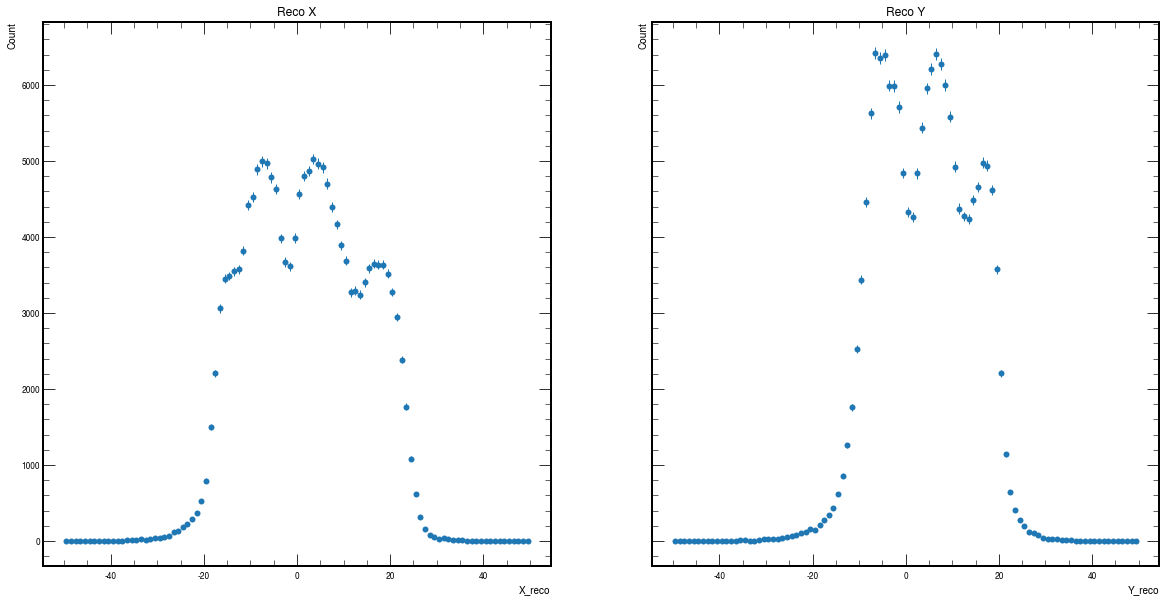

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True,sharex=True)


h, bins = np.histogram(x_reco, range=(-50,50), bins=100)

bin_centers = 0.5 * (bins[:-1] + bins[1:])
errors = np.sqrt(h)
axes[0].errorbar(bin_centers, h, yerr=errors, fmt='o', ecolor='tab:blue', color='tab:blue',
                      capsize=0, elinewidth=1, markeredgewidth=0)
axes[0].set_title("Reco X")

axes[0].set_xlabel("X_reco")
axes[0].set_ylabel("Count")


h, bins = np.histogram(y_reco, range=(-50,50), bins=100)

bin_centers = 0.5 * (bins[:-1] + bins[1:])
errors = np.sqrt(h)
axes[1].errorbar(bin_centers, h, yerr=errors, fmt='o', ecolor='tab:blue', color='tab:blue',
                      capsize=0, elinewidth=1, markeredgewidth=0)
axes[1].set_title("Reco Y")

axes[1].set_xlabel("Y_reco")
axes[1].set_ylabel("Count")

1.9872849183361276
4.08650914600985


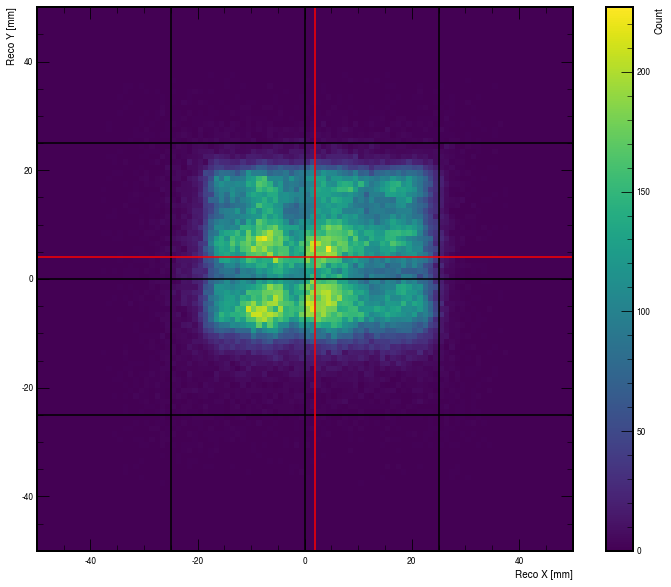

In [27]:
fig, axs = plt.subplots(1, 1, figsize=(12, 10))
plt.hist2d(x_reco, y_reco, bins=(100,100), cmap='viridis',range=np.array([(-50, 50), (-50, 50)]))
plt.colorbar(label="Count")
plt.xlabel("Reco X [mm]")
plt.ylabel("Reco Y [mm]")

square_size = 25
grid_size = 4 * square_size

# Draw vertical lines
for x in range(0, grid_size + 1, square_size):
    plt.axvline(x=x - grid_size / 2, color='black')

for y in range(0, grid_size + 1, square_size):
    plt.axhline(y=y - grid_size / 2, color='black')
    
plt.axvline(x=np.mean(x_reco), color='red')
plt.axhline(y=np.mean(y_reco), color='red')

print(np.mean(x_reco))
print(np.mean(y_reco))

Text(0, 1, 'Reco Y [mm]')

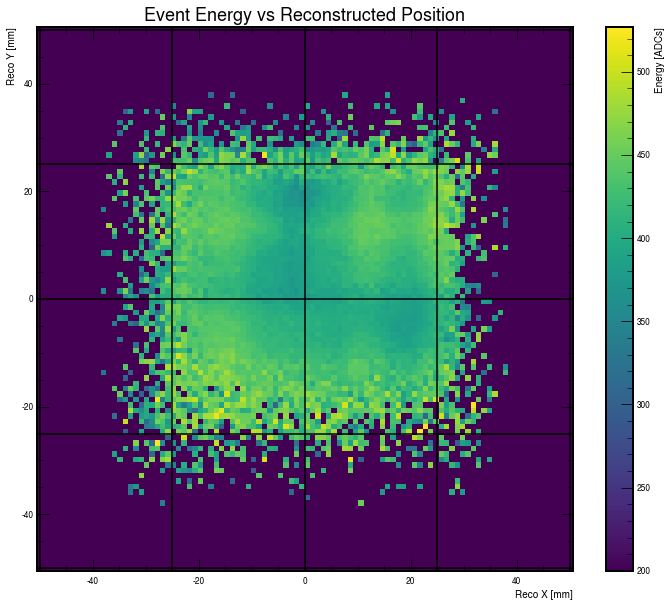

In [28]:
fig, axs = plt.subplots(1, 1, figsize=(12, 10))
y, x = np.meshgrid(np.linspace(-50, 50, 100), np.linspace(-50, 50, 100))
z = [[] for i in range(len(x))] 

from scipy import stats as st

for i, pos in enumerate(x):
    for j, x_pos in enumerate(pos):
        y_pos = y[i][j]
        mask = (x_reco > (x_pos - 0.5)) & (x_reco < (x_pos + 0.5)) & (y_reco > (y_pos - 0.5)) & (y_reco < (y_pos + 0.5))
        maskE = evtSum_list[mask] > 20
        if ( len (np.array(evtSum_list[mask][maskE])) != 0):
            z[i].append(np.median(evtSum_list[mask][maskE]))
        else:
            z[i].append(0)
        
#plt.pcolormesh(x, y, z, norm=mcolors.LogNorm())
plt.pcolormesh(x, y, z, vmin = 200)

for x in range(0, grid_size + 1, square_size):
    plt.axvline(x=x - grid_size / 2, color='black')

for y in range(0, grid_size + 1, square_size):
    plt.axhline(y=y - grid_size / 2, color='black')
    
plt.colorbar(label="Energy [ADCs]")

plt.title("Event Energy vs Reconstructed Position", fontsize = 18)
plt.xlabel("Reco X [mm]")
plt.ylabel("Reco Y [mm]")

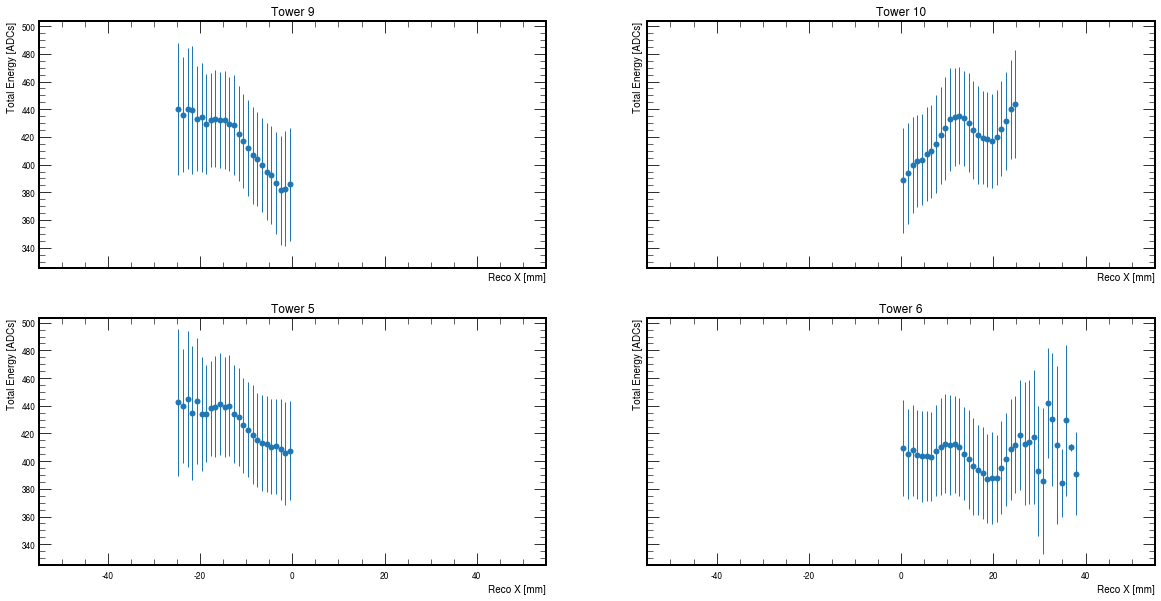

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10), sharey=True,sharex=True)

for i, tower in enumerate(towers):
    
    ax = axes[i // 2, i % 2]
    
    span = np.linspace(-50, 50, 100)
    x_dist = []
    x_std = []
  
    if tower == 9:
        tower_bounds = (x_reco < 0) & (x_reco > -25) & (y_reco > 0) & (y_reco < 25)
    if tower == 10:
        tower_bounds = (x_reco > 0) & (x_reco < 25) & (y_reco > 0) & (y_reco < 25)
    if tower == 5:
        tower_bounds = (x_reco < 0) & (x_reco > -25) & (y_reco < 0) & (y_reco > -25)
    if tower == 6:
        tower_bounds = (x_reco > 0) & (x_reco > -25) & (y_reco < 0) & (y_reco > -25)    
    
    for x_pos in span:
        mask = (x_reco > (x_pos - 0.5)) & (x_reco < (x_pos + 0.5)) 
        mask = mask & tower_bounds
        x_dist.append(np.median(evtSum_list[mask]))
        x_std.append(np.std(evtSum_list[mask]))

    
    ax.errorbar(span, x_dist, yerr=x_std, fmt='o', ecolor='tab:blue', color='tab:blue',
                      capsize=0, elinewidth=1, markeredgewidth=0)
    
    
    ax.set_title("Tower "+str(tower))

    ax.set_xlabel("Reco X [mm]")
    ax.set_ylabel("Total Energy [ADCs]")


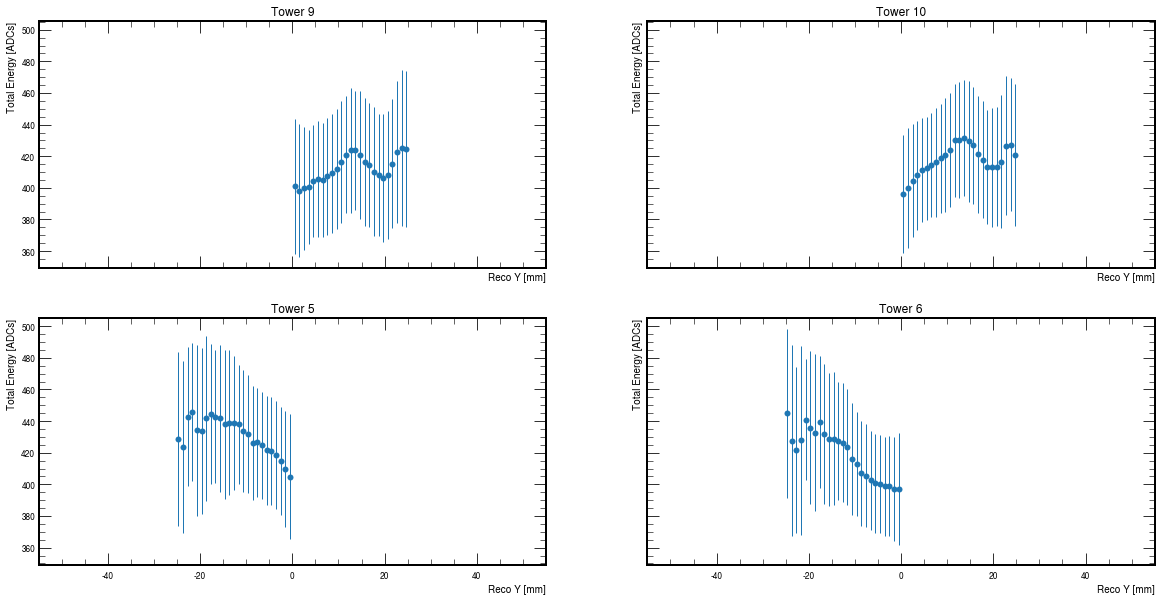

In [30]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10), sharey=True,sharex=True)
y_centers = []

for i, tower in enumerate(towers):
    
    ax = axes[i // 2, i % 2]
    
    if tower == 9:
        tower_bounds = (x_reco < 0) & (x_reco > -25) & (y_reco > 0) & (y_reco < 25)
    if tower == 10:
        tower_bounds = (x_reco > 0) & (x_reco < 25) & (y_reco > 0) & (y_reco < 25)
    if tower == 5:
        tower_bounds = (x_reco < 0) & (x_reco > -25) & (y_reco < 0) & (y_reco > -25)
    if tower == 6:
        tower_bounds = (x_reco > 0) & (x_reco > -25) & (y_reco < 0) & (y_reco > -25)
    
    span = np.linspace(-50, 50, 100)
    y_dist = []
    y_std = []
    for y_pos in span:
        mask = (y_reco > (y_pos - 0.5)) & (y_reco < (y_pos + 0.5)) 
        mask = mask & tower_bounds
        y_dist.append(np.mean(evtSum_list[mask]))
        y_std.append(np.std(evtSum_list[mask]))
        
    
    ax.errorbar(span, y_dist, yerr=y_std, fmt='o', ecolor='tab:blue', color='tab:blue',
                      capsize=0, elinewidth=1, markeredgewidth=0)
    
    ax.set_title("Tower "+str(tower))

    ax.set_xlabel("Reco Y [mm]")
    ax.set_ylabel("Total Energy [ADCs]")


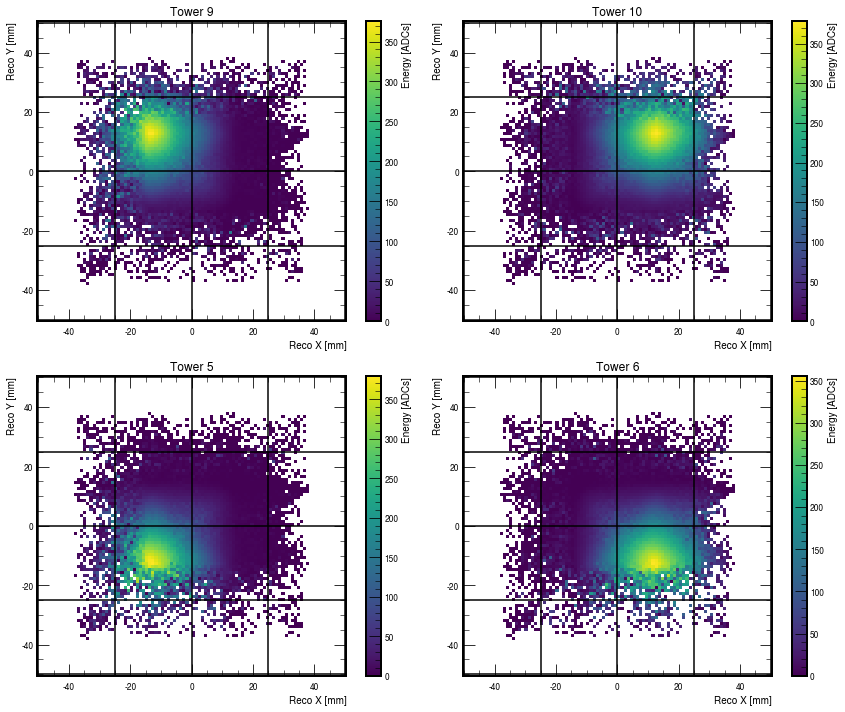

In [31]:

# Create a 2x2 subplot
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Generate the meshgrid
y, x = np.meshgrid(np.linspace(-50, 50, 100), np.linspace(-50, 50, 100))

# Loop over each tower and plot in the corresponding subplot
for idx, tower in enumerate(towers):
    z = [[] for _ in range(len(x))]
    for i, pos in enumerate(x):
        for j, x_pos in enumerate(pos):
            y_pos = y[i][j]
            mask = (linx_reco > (x_pos - 0.5)) & (linx_reco < (x_pos + 0.5)) & (liny_reco > (y_pos - 0.5)) & (liny_reco < (y_pos + 0.5))
            z[i].append(np.mean(evtCh_list[tower][mask]))

    ax = axs[idx // 2, idx % 2]
    c = ax.pcolormesh(x, y, z, shading='auto')
    fig.colorbar(c, ax=ax, label="Energy [ADCs]")

    for x_line in range(0, grid_size + 1, square_size):
        ax.axvline(x=x_line - grid_size / 2, color='black')

    for y_line in range(0, grid_size + 1, square_size):
        ax.axhline(y=y_line - grid_size / 2, color='black')

    ax.set_title(f"Tower {tower}", fontsize=12)
    ax.set_xlabel("Reco X [mm]")
    ax.set_ylabel("Reco Y [mm]")

plt.tight_layout()
plt.show()


/Users/spreins/opt/anaconda3/lib/python3.7/site-packages/iminuit/cost.py:75: RuntimeWarning: divide by zero encountered in true_divide
  z = (y - ym) / ye


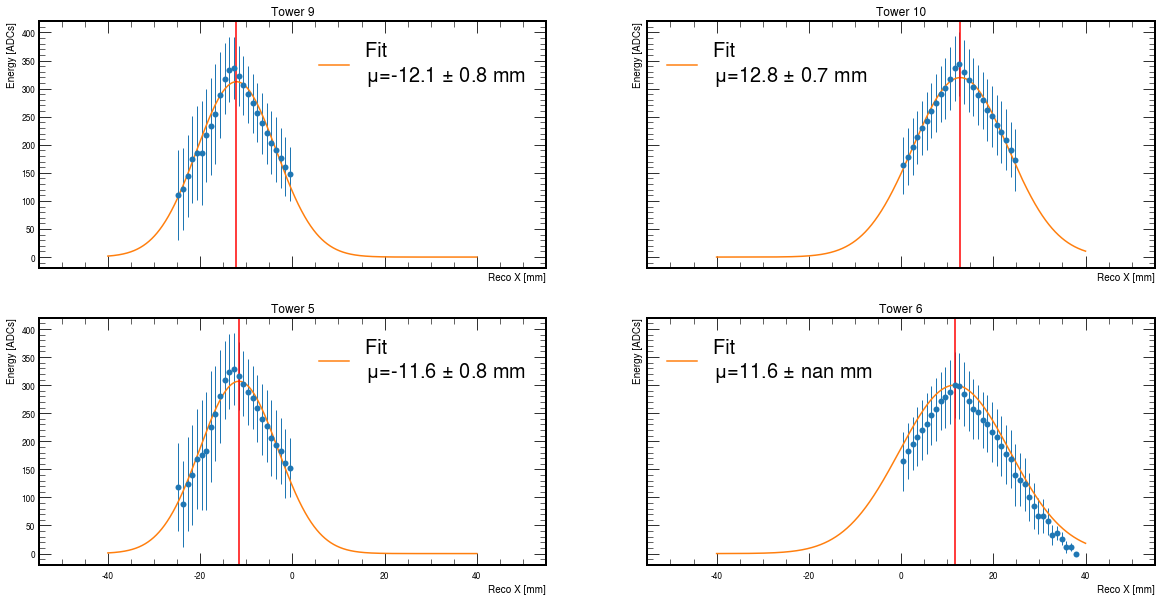

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10), sharey=True,sharex=True)

x_centers = []

for i, tower in enumerate(towers):
    
    ax = axes[i // 2, i % 2]
    
    span = np.linspace(-50, 50, 100)
    x_dist = []
    x_std = []
  
    if tower == 9:
        tower_bounds = (linx_reco < 0) & (linx_reco > -25) & (liny_reco > 0) & (liny_reco < 25)
    if tower == 10:
        tower_bounds = (linx_reco > 0) & (linx_reco < 25) & (liny_reco > 0) & (liny_reco < 25)
    if tower == 5:
        tower_bounds = (linx_reco < 0) & (linx_reco > -25) & (liny_reco < 0) & (liny_reco > -25)
    if tower == 6:
        tower_bounds = (linx_reco > 0) & (linx_reco > -25) & (liny_reco < 0) & (liny_reco > -25)    
    
    for x_pos in span:
        mask = (linx_reco > (x_pos - 0.5)) & (linx_reco < (x_pos + 0.5)) 
        mask = mask & tower_bounds
        x_dist.append(np.mean(evtCh_list[tower][mask]))
        x_std.append(np.std(evtCh_list[tower][mask]))

    
    ax.errorbar(span, x_dist, yerr=x_std, fmt='o', ecolor='tab:blue', color='tab:blue',
                      capsize=0, elinewidth=1, markeredgewidth=0)
    
    x_dist = np.array(x_dist)
    x_std = np.array(x_std)
    span = np.array(span)
    mask = ~np.isnan(x_dist)
    initial_params = [max(x_dist[mask]), span[mask][np.argmax(x_dist[mask])], 12]  
    m = Minuit(LeastSquares(span[mask], x_dist[mask], x_std[mask], gauss), A=initial_params[0], mu=initial_params[1], sigma=initial_params[2])
    m.limits["sigma"] = (0, None)
    m.migrad()
    fitted_params = m.values
    errors = m.errors
    A_fit = fitted_params['A']
    mu_fit = fitted_params['mu']
    sigma_fit = fitted_params['sigma']
    mu_err = errors['mu']
    x = np.linspace(-40, 40, 1500)
    y_fit = gauss(x, A_fit, mu_fit, sigma_fit)
    ax.plot(x, y_fit, 'tab:orange', label='Fit \n$\mu$=%2.1f ± %2.1f mm'%(mu_fit, mu_err))
    ax.axvline(x=mu_fit, color='red')
    
    ax.legend(fontsize=20)
    
    ax.set_title("Tower "+str(tower))

    ax.set_xlabel("Reco X [mm]")
    ax.set_ylabel("Energy [ADCs]")
    
    x_centers.append(mu_fit)


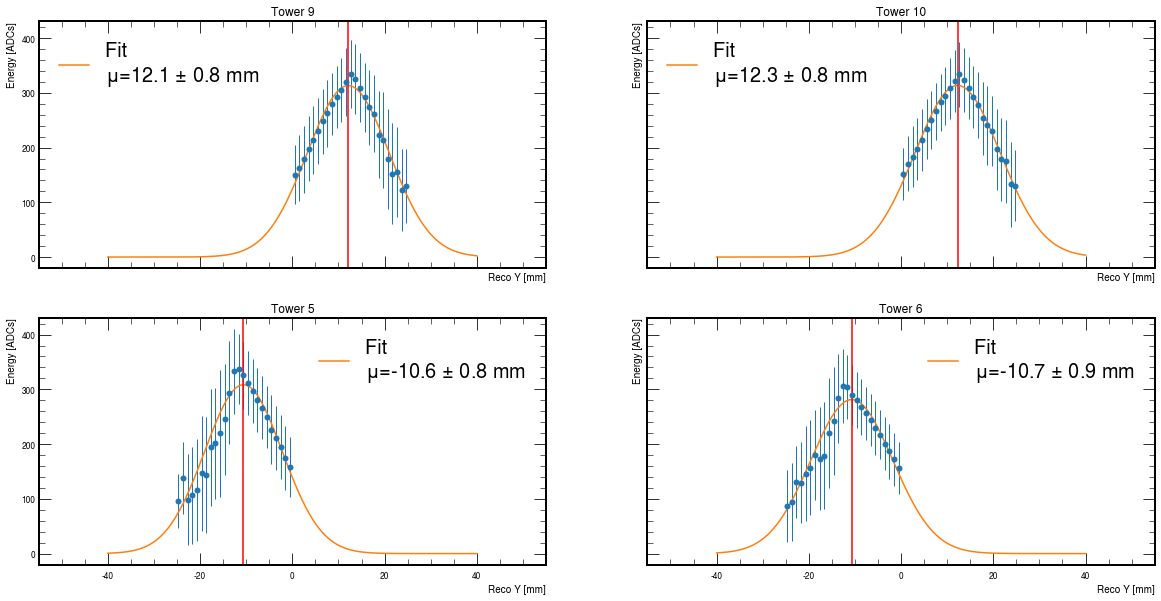

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10), sharey=True,sharex=True)
y_centers = []

for i, tower in enumerate(towers):
    
    ax = axes[i // 2, i % 2]
    
    if tower == 9:
        tower_bounds = (linx_reco < 0) & (linx_reco > -25) & (liny_reco > 0) & (liny_reco < 25)
    if tower == 10:
        tower_bounds = (linx_reco > 0) & (linx_reco < 25) & (liny_reco > 0) & (liny_reco < 25)
    if tower == 5:
        tower_bounds = (linx_reco < 0) & (linx_reco > -25) & (liny_reco < 0) & (liny_reco > -25)
    if tower == 6:
        tower_bounds = (linx_reco > 0) & (linx_reco > -25) & (liny_reco < 0) & (liny_reco > -25)
    
    span = np.linspace(-50, 50, 100)
    y_dist = []
    y_std = []
    for y_pos in span:
        mask = (liny_reco > (y_pos - 0.5)) & (liny_reco < (y_pos + 0.5)) 
        mask = mask & tower_bounds
        y_dist.append(np.mean(evtCh_list[tower][mask]))
        y_std.append(np.std(evtCh_list[tower][mask]))
        
    
    ax.errorbar(span, y_dist, yerr=y_std, fmt='o', ecolor='tab:blue', color='tab:blue',
                      capsize=0, elinewidth=1, markeredgewidth=0)
    
    y_dist = np.array(y_dist)
    y_std = np.array(y_std)
    span = np.array(span)
    mask = ~np.isnan(y_dist)
    initial_params = [max(y_dist[mask]), span[mask][np.argmax(y_dist[mask])], 10]  
    m = Minuit(LeastSquares(span[mask], y_dist[mask], y_std[mask], gauss), A=initial_params[0], mu=initial_params[1], sigma=initial_params[2])
    m.limits["sigma"] = (0, None)
    m.migrad()
    fitted_params = m.values
    errors = m.errors
    A_fit = fitted_params['A']
    mu_fit = fitted_params['mu']
    sigma_fit = fitted_params['sigma']
    mu_err = errors['mu']
    x = np.linspace(-40, 40, 1500)
    y_fit = gauss(x, A_fit, mu_fit, sigma_fit)
    ax.plot(x, y_fit, 'tab:orange', label='Fit \n$\mu$=%2.1f ± %2.1f mm'%(mu_fit, mu_err))
    ax.legend(fontsize=20)
    ax.axvline(x=mu_fit, color='red')
    ax.set_title("Tower "+str(tower))

    ax.set_xlabel("Reco Y [mm]")
    ax.set_ylabel("Energy [ADCs]")
    y_centers.append(mu_fit)

[1.01449414 1.05076537 0.98952726 0.94521323]


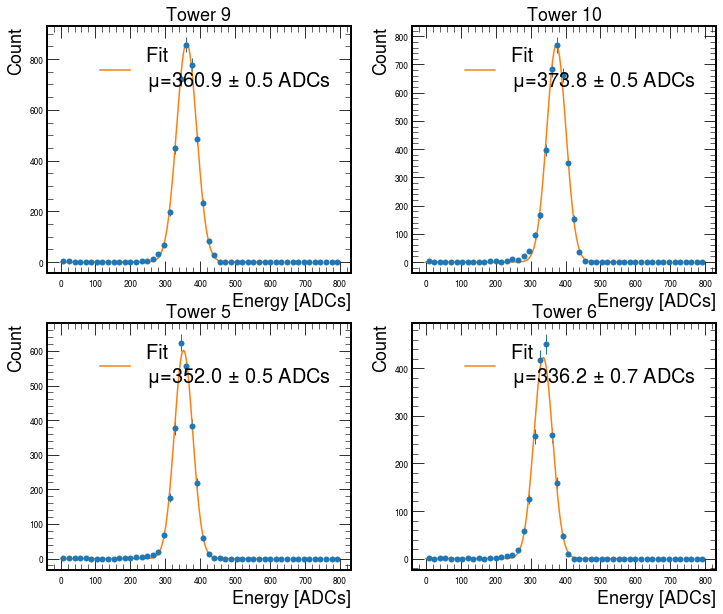

In [48]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

width = 1

towerMeans = []

for idx, tower in enumerate(towers):
    x_pos = x_centers[idx]
    y_pos = y_centers[idx]
    ax = axs[idx // 2, idx% 2]
    posmask = (linx_reco > (x_pos - width)) & (linx_reco < (x_pos + width)) & (liny_reco > (y_pos - width)) & (liny_reco < (y_pos + width))

    h, bins = np.histogram(evtCh_list[tower][posmask], range=(0,800), bins=50)

    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    errors = np.sqrt(h)
    ax.errorbar(bin_centers, h, yerr=errors, fmt='o', ecolor='tab:blue', color='tab:blue',
                      capsize=0, elinewidth=1, markeredgewidth=0)
    
    tower_dist = evtCh_list[tower][posmask][ evtCh_list[tower][posmask] > 250 ]
    initial_params = [max(h), np.mean(tower_dist), np.std(tower_dist)]
    
    m = Minuit(LeastSquares(bin_centers[h>0], h[h>0], errors[h>0], gauss), A=initial_params[0], mu=initial_params[1], sigma=initial_params[2])
    m.limits["sigma"] = (0, None)
    m.migrad()
    fitted_params = m.values
    errors = m.errors
    A_fit = fitted_params['A']
    mu_fit = fitted_params['mu']
    sigma_fit = fitted_params['sigma']
    mu_err = errors['mu']
    x = np.linspace(0, 600, 1500)
    y_fit = gauss(x, A_fit, mu_fit, sigma_fit)
    ax.plot(x, y_fit, 'tab:orange', label='Fit \n$\mu$=%2.1f ± %2.1f ADCs'%(mu_fit, mu_err))
    ax.legend(fontsize=20, loc='upper right')

    ax.set_title("Tower "+str(tower), fontsize = 18)
    ax.set_xlabel("Energy [ADCs]", fontsize = 18)
    ax.set_ylabel("Count", fontsize = 18)
    
    towerMeans.append(mu_fit)
calibrations = towerMeans / np.mean(towerMeans)
print(towerMeans / np.mean(towerMeans))

In [49]:
calibrated_ch = [np.array(evtCh_list[ch]) for ch in range(16)]
        
for i, tower in enumerate(towers):
    calibrated_ch[tower] = np.array(evtCh_list[tower] / calibrations[i])

calibrated_ch = np.array(calibrated_ch)
caliEvtSum = calibrated_ch.sum(axis=0)

calix_reco = []
caliy_reco = []

lincalix_reco = []
lincaliy_reco = []

for evt in range(len(calibrated_ch[0])):
    
    calix_pos = 0
    caliy_pos = 0
    
    lincalix_pos = 0
    lincaliy_pos = 0

    w_tot = 0
    for ch in range(16):
        w = max([ np.log(calibrated_ch[ch][evt] / caliEvtSum[evt]) + 3.8, 0])
        w_tot = w_tot + w
        calix_pos = calix_pos + (channel_to_xy(ch)[0] * w)
        caliy_pos = caliy_pos + (channel_to_xy(ch)[1] * w)
        lincalix_pos = lincalix_pos + (channel_to_xy(ch)[0] * calibrated_ch[ch][evt])
        lincaliy_pos = lincaliy_pos + (channel_to_xy(ch)[1] * calibrated_ch[ch][evt])
        

    calix_reco.append(calix_pos / w_tot)
    caliy_reco.append(caliy_pos / w_tot)
    
    lincalix_reco.append(lincalix_pos / caliEvtSum[evt])
    lincaliy_reco.append(lincaliy_pos / caliEvtSum[evt])


calix_reco = np.array(calix_reco)
caliy_reco = np.array(caliy_reco)

lincalix_reco = np.array(lincalix_reco)
lincaliy_reco = np.array(lincaliy_reco)

/Users/spreins/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log


Mean: 410.7521462267562
Mean Error: 0.09568907151251346
Resolution: 9.152317792089846
Resolution Error: 0.020516315651908538


Text(0, 1, 'Count')

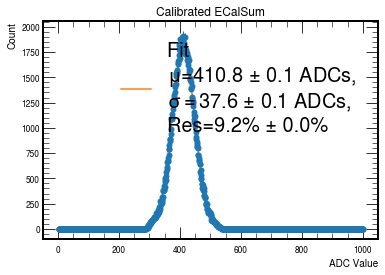

In [50]:
lowRange = 1
highRange = 1001
bins = 1000
lowFit = 300
highFit = 500
x_pos = 25/2
y_pos = 25/2
width = 500

posmask = (calix_reco > (x_pos - width)) & (calix_reco < (x_pos + width)) & (caliy_reco > (y_pos - width)) & (caliy_reco < (y_pos + width))

h, bins = np.histogram(caliEvtSum[posmask], bins=bins, range=(lowRange,highRange))
bin_centers = 0.5 * (bins[:-1] + bins[1:])
errors = np.sqrt(h)
plt.errorbar(bin_centers, h, yerr=errors, fmt='o', ecolor='tab:blue', color='tab:blue',
                      capsize=0, elinewidth=1, markeredgewidth=0)


mask = (h > 0) & (bin_centers > lowFit) & (bin_centers < highFit)

initial_params = [max(h[mask]),np.mean(caliEvtSum[caliEvtSum > lowFit]),np.std(caliEvtSum[caliEvtSum > lowFit])]

m = Minuit(LeastSquares(bin_centers[mask], h[mask], errors[mask], gauss), A=initial_params[0], mu=initial_params[1], sigma=initial_params[2])
m.limits["sigma"] = (0, None)
m.migrad()
fitted_params = m.values
errors = m.errors
A_fit = fitted_params['A']
mu_fit = fitted_params['mu']
sigma_fit = fitted_params['sigma']

A_err = errors['A']
mu_err = errors['mu']
sigma_err = errors['sigma']

x = np.linspace(lowFit, highFit, 2000)
y_fit = gauss(x, A_fit, mu_fit, sigma_fit)

res = np.sqrt((100*res)**2 - 1.8**2)

# Step 1: Calculate r and its error
r = sigma_fit / mu_fit
delta_r = r * np.sqrt((sigma_err / sigma_fit)**2 + (mu_err / mu_fit)**2)

# Step 2: Calculate s and its error
s = 100 * r
delta_s = 100 * delta_r

# Step 3: Calculate res and its error
res = np.sqrt(s**2 - 1.8**2)
delta_res = (s / np.sqrt(s**2 - 1.8**2)) * delta_s

x = np.linspace(lowFit, highFit, 1500)
y_fit = gauss(x, A_fit, mu_fit, sigma_fit)
res = 100 * sigma_fit/mu_fit

plt.plot(x, y_fit, 'tab:orange', label='Fit \n$\mu$=%2.1f ± %2.1f ADCs, \n$\sigma=$%2.1f ± %2.1f ADCs, \nRes=%2.1f%% ± %2.1f%%'%(mu_fit, mu_err, sigma_fit, sigma_err, res, delta_res))
plt.legend(loc='upper right', fontsize=20)   

print("Mean: " + str(mu_fit))
print("Mean Error: " + str(mu_err))
print("Resolution: " + str(res))
print("Resolution Error: " + str(delta_res))

caliElectronMean = mu_fit
plt.title("Calibrated ECalSum")
plt.xlabel("ADC Value")
plt.ylabel("Count")

Text(0, 1, 'Reco Y [mm]')

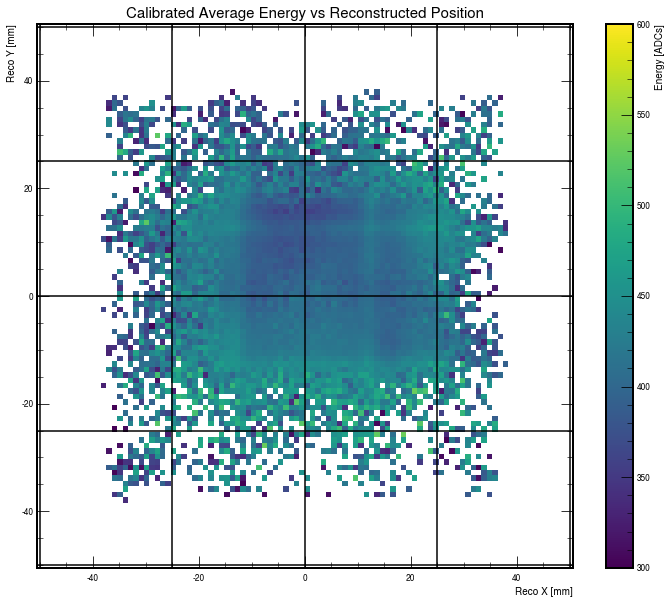

In [37]:
fig, axs = plt.subplots(1, 1, figsize=(12, 10))
y, x = np.meshgrid(np.linspace(-50, 50, 100), np.linspace(-50, 50, 100))
z = [[] for i in range(len(x))] 

for i, pos in enumerate(x):
    for j, x_pos in enumerate(pos):
        y_pos = y[i][j]
        mask = (lincalix_reco > (x_pos - 0.5)) & (lincalix_reco < (x_pos + 0.5)) & (lincaliy_reco > (y_pos - 0.5)) & (lincaliy_reco < (y_pos + 0.5))
        z[i].append(np.mean(caliEvtSum[mask]))
        
#plt.pcolormesh(x, y, z, norm=mcolors.LogNorm())
plt.pcolormesh(x, y, z, vmin=300, vmax=600)


for x in range(0, grid_size + 1, square_size):
    plt.axvline(x=x - grid_size / 2, color='black')

for y in range(0, grid_size + 1, square_size):
    plt.axhline(y=y - grid_size / 2, color='black')
    
plt.colorbar(label="Energy [ADCs]")

plt.title("Calibrated Average Energy vs Reconstructed Position", fontsize = 15)
plt.xlabel("Reco X [mm]")
plt.ylabel("Reco Y [mm]")

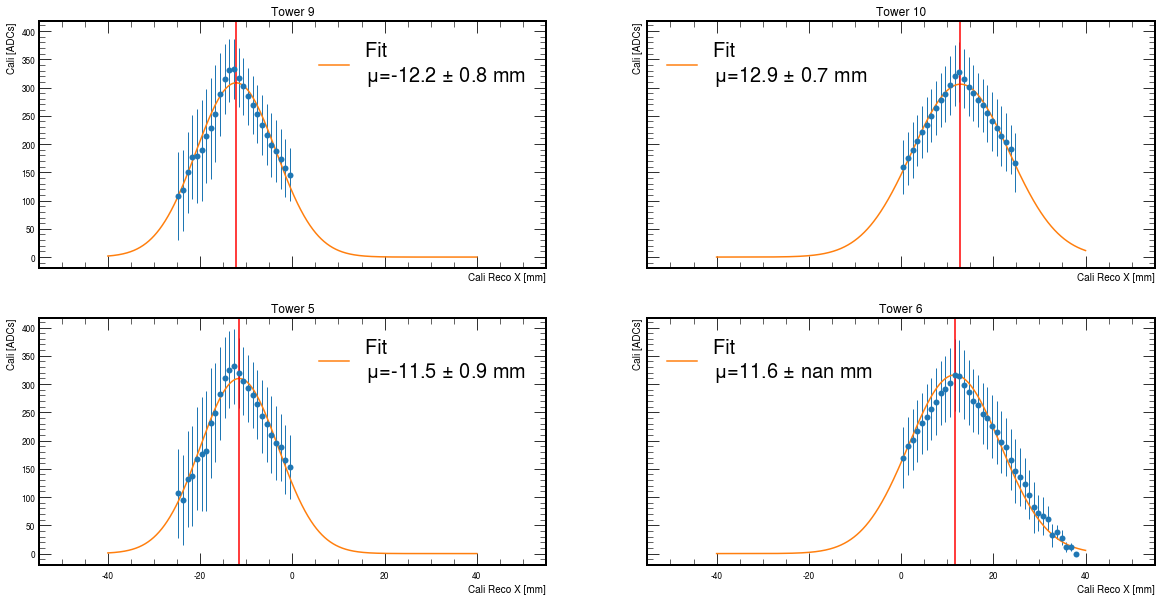

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10), sharey=True,sharex=True)
calix_centers = []

for i, tower in enumerate(towers):
    
    ax = axes[i // 2, i % 2]
    
    if tower == 9:
        tower_bounds = (lincalix_reco < 0) & (lincalix_reco > -25) & (lincaliy_reco > 0) & (lincaliy_reco < 25)
    if tower == 10:
        tower_bounds = (lincalix_reco > 0) & (lincalix_reco < 25) & (lincaliy_reco > 0) & (lincaliy_reco < 25)
    if tower == 5:
        tower_bounds = (lincalix_reco < 0) & (lincalix_reco > -25) & (lincaliy_reco < 0) & (lincaliy_reco > -25)
    if tower == 6:
        tower_bounds = (lincalix_reco > 0) & (lincalix_reco > -25) & (lincaliy_reco < 0) & (lincaliy_reco > -25)
    
    span = np.linspace(-50, 50, 100)
    x_dist = []
    x_std = []
    for x_pos in span:
        mask = (lincalix_reco > (x_pos - 0.5)) & (lincalix_reco < (x_pos + 0.5)) 
        mask = mask & tower_bounds
        x_dist.append(np.mean(calibrated_ch[tower][mask]))
        x_std.append(np.std(calibrated_ch[tower][mask]))
        
    
    ax.errorbar(span, x_dist, yerr=x_std, fmt='o', ecolor='tab:blue', color='tab:blue',
                      capsize=0, elinewidth=1, markeredgewidth=0)
    
    x_dist = np.array(x_dist)
    x_std = np.array(x_std)
    span = np.array(span)
    mask = ~np.isnan(x_dist)
    initial_params = [max(x_dist[mask]), span[mask][np.argmax(x_dist[mask])], 10]  
    m = Minuit(LeastSquares(span[mask], x_dist[mask], x_std[mask], gauss), A=initial_params[0], mu=initial_params[1], sigma=initial_params[2])
    m.limits["sigma"] = (0, None)
    m.migrad()
    fitted_params = m.values
    errors = m.errors
    A_fit = fitted_params['A']
    mu_fit = fitted_params['mu']
    sigma_fit = fitted_params['sigma']
    mu_err = errors['mu']
    x = np.linspace(-40, 40, 1500)
    y_fit = gauss(x, A_fit, mu_fit, sigma_fit)
    ax.plot(x, y_fit, 'tab:orange', label='Fit \n$\mu$=%2.1f ± %2.1f mm'%(mu_fit, mu_err))
    ax.legend(fontsize=20)
    ax.axvline(x=mu_fit, color='red')
    ax.set_title("Tower "+str(tower))

    ax.set_xlabel("Cali Reco X [mm]")
    ax.set_ylabel("Cali [ADCs]")
    calix_centers.append(mu_fit)

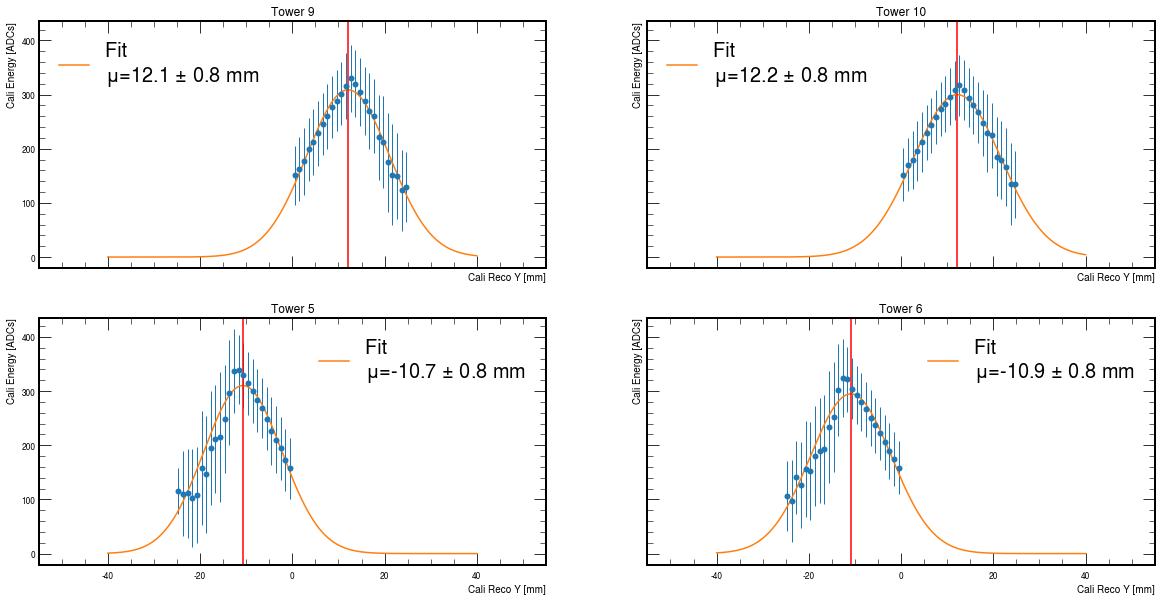

In [39]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10), sharey=True,sharex=True)
caliy_centers = []

for i, tower in enumerate(towers):
    
    ax = axes[i // 2, i % 2]
    
    if tower == 9:
        tower_bounds = (lincalix_reco < 0) & (lincalix_reco > -25) & (lincaliy_reco > 0) & (lincaliy_reco < 25)
    if tower == 10:
        tower_bounds = (lincalix_reco > 0) & (lincalix_reco < 25) & (lincaliy_reco > 0) & (lincaliy_reco < 25)
    if tower == 5:
        tower_bounds = (lincalix_reco < 0) & (lincalix_reco > -25) & (lincaliy_reco < 0) & (lincaliy_reco > -25)
    if tower == 6:
        tower_bounds = (lincalix_reco > 0) & (lincalix_reco > -25) & (lincaliy_reco < 0) & (lincaliy_reco > -25)
    
    
    span = np.linspace(-50, 50, 100)
    y_dist = []
    y_std = []
    for y_pos in span:
        mask = (lincaliy_reco > (y_pos - 0.5)) & (lincaliy_reco < (y_pos + 0.5)) 
        mask = mask & tower_bounds
        y_dist.append(np.mean(calibrated_ch[tower][mask]))
        y_std.append(np.std(calibrated_ch[tower][mask]))
        
    
    ax.errorbar(span, y_dist, yerr=y_std, fmt='o', ecolor='tab:blue', color='tab:blue',
                      capsize=0, elinewidth=1, markeredgewidth=0)
    
    y_dist = np.array(y_dist)
    y_std = np.array(y_std)
    span = np.array(span)
    mask = ~np.isnan(y_dist)
    initial_params = [max(y_dist[mask]), span[mask][np.argmax(y_dist[mask])]+3, 10]  
    m = Minuit(LeastSquares(span[mask], y_dist[mask], y_std[mask], gauss), A=initial_params[0], mu=initial_params[1], sigma=initial_params[2])
    m.limits["sigma"] = (0, None)
    m.migrad()
    fitted_params = m.values
    errors = m.errors
    A_fit = fitted_params['A']
    mu_fit = fitted_params['mu']
    sigma_fit = fitted_params['sigma']
    mu_err = errors['mu']
    x = np.linspace(-40, 40, 1500)
    y_fit = gauss(x, A_fit, mu_fit, sigma_fit)
    ax.plot(x, y_fit, 'tab:orange', label='Fit \n$\mu$=%2.1f ± %2.1f mm'%(mu_fit, mu_err))
    ax.legend(fontsize=20)
    ax.axvline(x=mu_fit, color='red')
    ax.set_title("Tower "+str(tower))

    ax.set_xlabel("Cali Reco Y [mm]")
    ax.set_ylabel("Cali Energy [ADCs]")
    caliy_centers.append(mu_fit)

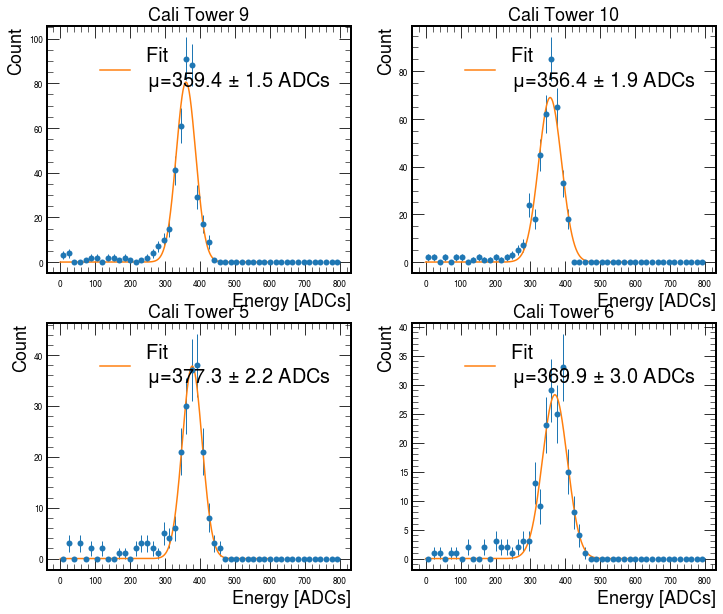

In [40]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

width = 1

for idx, tower in enumerate(towers):
    x_pos = calix_centers[idx]
    y_pos = caliy_centers[idx]
    ax = axs[idx // 2, idx% 2]
    posmask = (calix_reco > (x_pos - width)) & (calix_reco < (x_pos + width)) & (caliy_reco > (y_pos - width)) & (caliy_reco < (y_pos + width))

    h, bins = np.histogram(calibrated_ch[tower][posmask], range=(0,800), bins=50)

    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    errors = np.sqrt(h)
    ax.errorbar(bin_centers, h, yerr=errors, fmt='o', ecolor='tab:blue', color='tab:blue',
                      capsize=0, elinewidth=1, markeredgewidth=0)
    
    tower_dist = calibrated_ch[tower][posmask][ calibrated_ch[tower][posmask] > 250 ]
    initial_params = [max(h), np.mean(tower_dist), np.std(tower_dist)]
    
    m = Minuit(LeastSquares(bin_centers[h>0], h[h>0], errors[h>0], gauss), A=initial_params[0], mu=initial_params[1], sigma=initial_params[2])
    m.limits["sigma"] = (0, None)
    m.migrad()
    fitted_params = m.values
    errors = m.errors
    A_fit = fitted_params['A']
    mu_fit = fitted_params['mu']
    sigma_fit = fitted_params['sigma']
    mu_err = errors['mu']
    x = np.linspace(0, 600, 1500)
    y_fit = gauss(x, A_fit, mu_fit, sigma_fit)
    ax.plot(x, y_fit, 'tab:orange', label='Fit \n$\mu$=%2.1f ± %2.1f ADCs'%(mu_fit, mu_err))
    ax.legend(fontsize=20, loc='upper right')
    ax.set_title("Cali Tower "+str(tower), fontsize = 18)
    ax.set_xlabel("Energy [ADCs]", fontsize = 18)
    ax.set_ylabel("Count", fontsize = 18)

Text(1, 0, 'ECal Y Pos - Hod Y Pos')

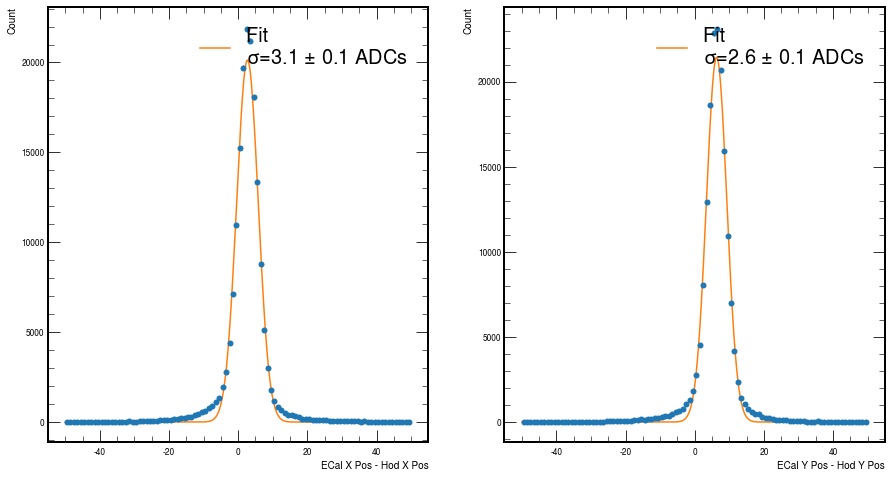

In [51]:
deltaX = calix_reco + HodYElectron
deltaY = caliy_reco - HodXElectron

fig, axs = plt.subplots(1, 2, figsize=(15, 8))

h, bins = np.histogram(deltaX, range=(-50,50), bins=100)

bin_centers = 0.5 * (bins[:-1] + bins[1:])
errors = np.sqrt(h)
axs[0].errorbar(bin_centers, h, yerr=errors, fmt='o', ecolor='tab:blue', color='tab:blue',
                      capsize=0, elinewidth=1, markeredgewidth=0)

initial_params = [max(h), 0, 1]
    
m = Minuit(LeastSquares(bin_centers[h>0], h[h>0], errors[h>0], gauss), A=initial_params[0], mu=initial_params[1], sigma=initial_params[2])
m.limits["sigma"] = (0, None)
m.migrad()
fitted_params = m.values
errors = m.errors
A_fit = fitted_params['A']
mu_fit = fitted_params['mu']
sigma_fit = fitted_params['sigma']
mu_err = errors['mu']
x = np.linspace(-50, 50, 1500)
y_fit = gauss(x, A_fit, mu_fit, sigma_fit)

axs[0].plot(x, y_fit, 'tab:orange', label='Fit \n$\sigma$=%2.1f ± %2.1f ADCs'%(sigma_fit, sigma_err))
axs[0].legend(fontsize=20, loc='upper right')

axs[0].set_ylabel("Count")
axs[0].set_xlabel("ECal X Pos - Hod X Pos")

h, bins = np.histogram(deltaY, range=(-50,50), bins=100)

bin_centers = 0.5 * (bins[:-1] + bins[1:])
errors = np.sqrt(h)
axs[1].errorbar(bin_centers, h, yerr=errors, fmt='o', ecolor='tab:blue', color='tab:blue',
                      capsize=0, elinewidth=1, markeredgewidth=0)

m = Minuit(LeastSquares(bin_centers[h>0], h[h>0], errors[h>0], gauss), A=initial_params[0], mu=initial_params[1], sigma=initial_params[2])
m.limits["sigma"] = (0, None)
m.migrad()
fitted_params = m.values
errors = m.errors
A_fit = fitted_params['A']
mu_fit = fitted_params['mu']
sigma_fit = fitted_params['sigma']
mu_err = errors['mu']
x = np.linspace(-50, 50, 1500)
y_fit = gauss(x, A_fit, mu_fit, sigma_fit)

axs[1].plot(x, y_fit, 'tab:orange', label='Fit \n$\sigma$=%2.1f ± %2.1f ADCs'%(np.sqrt(sigma_fit**2 - (4.9**2)/12), sigma_err))
axs[1].legend(fontsize=20, loc='upper right')

axs[1].set_ylabel("Count")
axs[1].set_xlabel("ECal Y Pos - Hod Y Pos")

Text(0, 1, 'Total/Mean Energy')

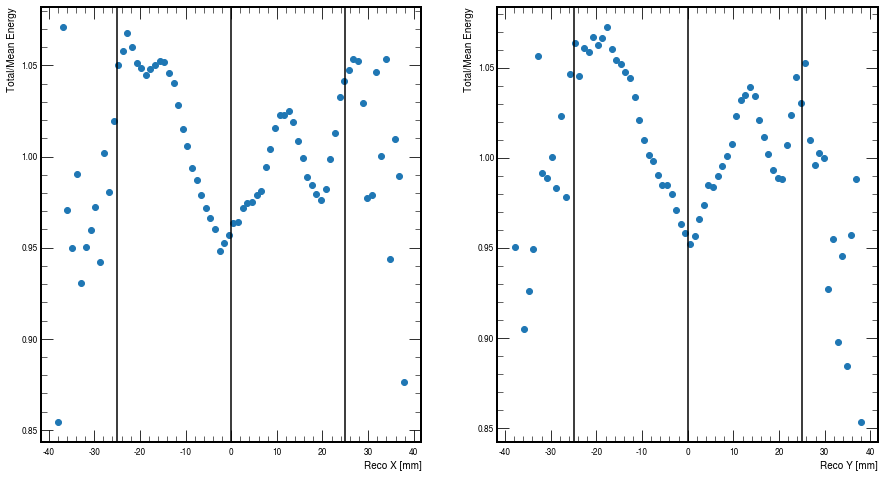

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8))

span = np.linspace(-50, 50, 100)
x_dist = []
x_std = []
      
    
for x_pos in span:

    mask = (calix_reco > (x_pos - 0.5)) & (calix_reco < (x_pos + 0.5)) 

    x_dist.append(np.median(caliEvtSum[mask]))
    x_std.append(np.std(caliEvtSum[mask]))

x_dist = np.array(x_dist)
x_std = np.array(x_dist)
x_std = x_std / np.mean(x_dist[x_dist>0])
x_dist = x_dist / np.mean(x_dist[x_dist>0])

axs[0].scatter(span, x_dist)

axs[0].axvline(x=0, color='black')
axs[0].axvline(x=25, color='black')
axs[0].axvline(x=-25, color='black')

axs[0].set_xlabel("Reco X [mm]")
axs[0].set_ylabel("Total/Mean Energy")

y_dist = []
y_std = []

for y_pos in span:
    mask = (caliy_reco > (y_pos - 0.5)) & (caliy_reco < (y_pos + 0.5)) 
    y_dist.append(np.median(evtSum_list[mask]))
    y_std.append(np.std(evtSum_list[mask]))

y_dist = np.array(y_dist)
y_std = np.array(y_dist)
y_std = y_std / np.mean(y_dist[y_dist>0])
y_dist = y_dist / np.mean(y_dist[y_dist>0])

axs[1].axvline(x=0, color='black')
axs[1].axvline(x=25, color='black')
axs[1].axvline(x=-25, color='black')


axs[1].scatter(span, y_dist)

axs[1].set_xlabel("Reco Y [mm]")
axs[1].set_ylabel("Total/Mean Energy")
    


Text(0, 1, 'Reco Y [mm]')

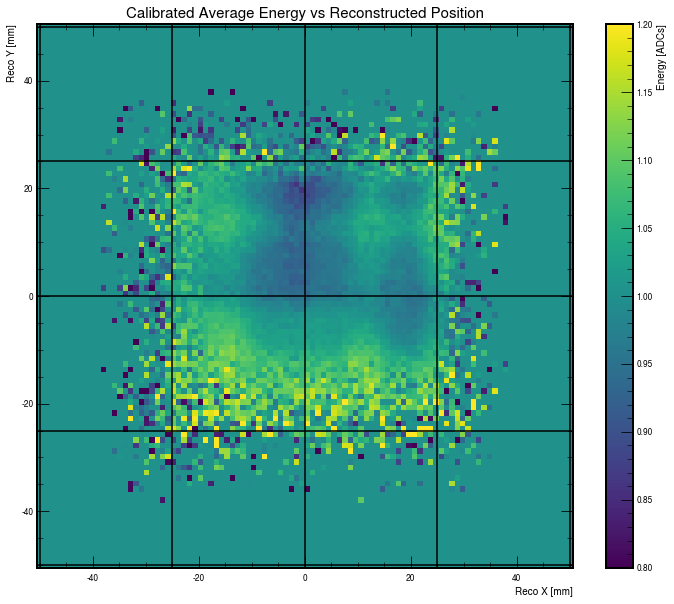

In [43]:
fig, axs = plt.subplots(1, 1, figsize=(12, 10))
ym, xm = np.meshgrid(np.linspace(-50, 50, 100), np.linspace(-50, 50, 100))
zm = [[] for i in range(len(xm))] 
width = 0.5
for i, pos in enumerate(xm):
    for j, x_pos in enumerate(pos):
        y_pos = ym[i][j]
        mask = (calix_reco > (x_pos - width)) & (calix_reco < (x_pos + width)) & (caliy_reco > (y_pos - width)) & (caliy_reco < (y_pos + width))
        if(len(caliEvtSum[mask]) > 0):
            zm[i].append(np.mean(caliEvtSum[mask]) / caliElectronMean)
        else:
            zm[i].append(1)
zm = np.array(zm)

plt.pcolormesh(xm, ym, zm, vmin = 0.8, vmax = 1.2)


for xi in range(0, grid_size + 1, square_size):
    plt.axvline(x=xi - grid_size / 2, color='black')

for yi in range(0, grid_size + 1, square_size):
    plt.axhline(y=yi - grid_size / 2, color='black')
    
plt.colorbar(label="Energy [ADCs]")

plt.title("Calibrated Average Energy vs Reconstructed Position", fontsize = 15)
plt.xlabel("Reco X [mm]")
plt.ylabel("Reco Y [mm]")

Text(0, 1, 'Reco Y [mm]')

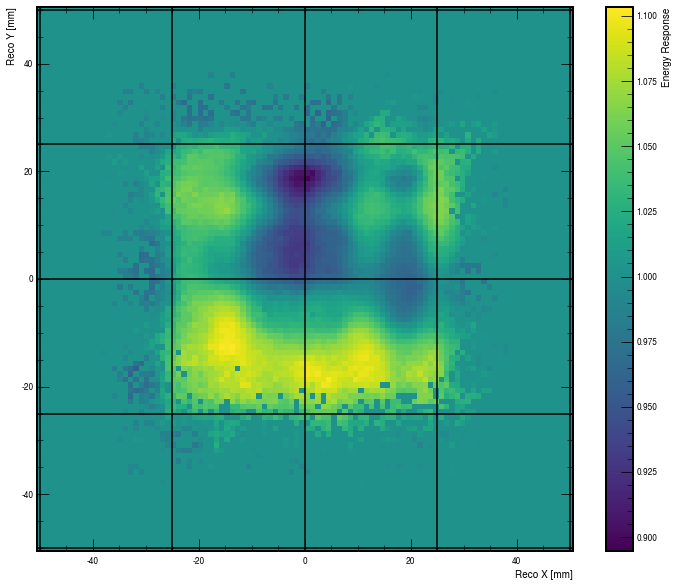

In [44]:
fig, axs = plt.subplots(1, 1, figsize=(12, 10))
# Generate your 2D array as given
map_y, map_x = np.meshgrid(np.linspace(-50, 50, 100), np.linspace(-50, 50, 100))
z = [[] for i in range(len(map_x))]
width = 0.5

# Assuming calix_reco, lincaliy_reco, caliEvtSum, and caliElectronMean are defined
weight_map = np.zeros_like(map_x)

for i, pos in enumerate(map_x):
    for j, x_pos in enumerate(pos):
        y_pos = map_y[i][j]
        mask = (calix_reco > (x_pos - width)) & (calix_reco < (x_pos + width)) & (caliy_reco > (y_pos - width)) & (caliy_reco < (y_pos + width))
        weight_map[i, j] = len(caliEvtSum[mask])
        if weight_map[i, j] > 0:
            z[i].append(np.mean(caliEvtSum[mask]) / caliElectronMean)
        else:
            z[i].append(1)
z = np.array(z)

# Define a function to create a circular kernel
def circular_kernel(radius):
    size = int(2 * radius + 1)
    kernel = np.zeros((size, size))
    y, x = np.ogrid[-radius:radius+1, -radius:radius+1]
    mask = x**2 + y**2 <= radius**2
    kernel[mask] = 1
    kernel = kernel / np.sum(kernel)  # Normalize the kernel
    return kernel

# Define the minimum and maximum radii
min_radius = 0.5
max_radius = 5

# Create the smoothed map
map_z_smoothed = np.zeros_like(z)

for i in range(z.shape[0]):
    for j in range(z.shape[1]):
        entries = weight_map[i, j]
        if entries > 0:
            # Map the number of entries to a radius between min_radius and max_radius
            radius = max_radius - (entries / np.max(weight_map) * (max_radius - min_radius))
            kernel = circular_kernel(int(radius))
            sub_z = z[max(i - int(radius), 0):min(i + int(radius) + 1, z.shape[0]),
                      max(j - int(radius), 0):min(j + int(radius) + 1, z.shape[1])]
            sub_z_padded = np.pad(sub_z, ((max(0, int(radius) - i), max(0, i + int(radius) + 1 - z.shape[0])),
                                          (max(0, int(radius) - j), max(0, j + int(radius) + 1 - z.shape[1]))), 
                                  'constant', constant_values=1)
            smoothed_value = convolve(sub_z_padded, kernel, mode='constant', cval=1)
            map_z_smoothed[i, j] = smoothed_value[int(radius), int(radius)]
        else:
            map_z_smoothed[i, j] = 1
            
for xi in range(0, grid_size + 1, square_size):
    plt.axvline(x=xi - grid_size / 2, color='black')

for yi in range(0, grid_size + 1, square_size):
    plt.axhline(y=yi - grid_size / 2, color='black')
    
# Plot the smoothed map
plt.pcolormesh(map_x, map_y, map_z_smoothed)
plt.colorbar(label="Energy Response")

plt.xlabel("Reco X [mm]")
plt.ylabel("Reco Y [mm]")

In [45]:
def find_closest_value(x_grid, y_grid, z_smooth, x_pos, y_pos):
    # Calculate the distance between the input point and all points in the grid
    distances = np.sqrt((x_grid - x_pos)**2 + (y_grid - y_pos)**2)
    
    # Find the indices of the minimum distance
    min_index = np.unravel_index(np.argmin(distances), distances.shape)
    
    # Return the value at the closest point in z_smooth
    return z_smooth[min_index]

map_caliEvtSum = []
for evt in range(len(caliEvtSum)):
    cali = find_closest_value(map_x, map_y, map_z_smoothed, calix_reco[evt], caliy_reco[evt])
    map_caliEvtSum.append(caliEvtSum[evt] / cali)
        
map_caliEvtSum = np.array(map_caliEvtSum)

Text(0, 1, 'Reco Y [mm]')

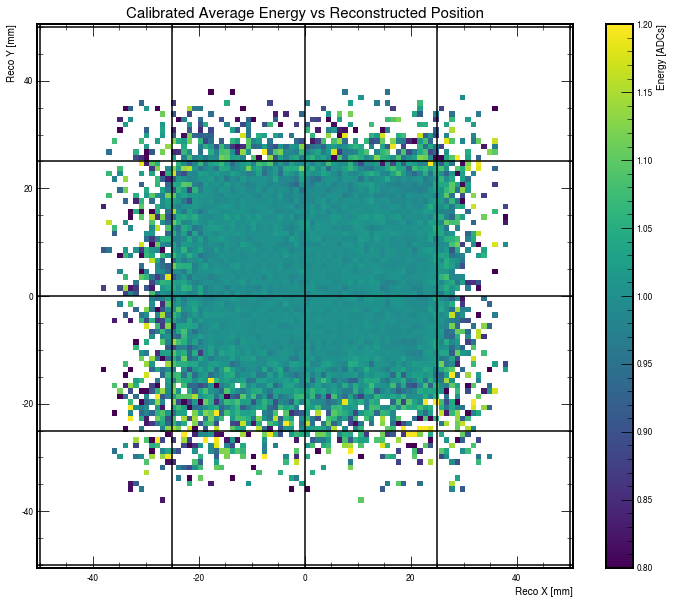

In [46]:
fig, axs = plt.subplots(1, 1, figsize=(12, 10))
y, x = np.meshgrid(np.linspace(-50, 50, 100), np.linspace(-50, 50, 100))
z = [[] for i in range(len(x))] 
width = 0.5
for i, pos in enumerate(x):
    for j, x_pos in enumerate(pos):
        y_pos = y[i][j]
        mask = (calix_reco > (x_pos - width)) & (calix_reco < (x_pos + width)) & (caliy_reco > (y_pos - width)) & (caliy_reco < (y_pos + width))
        z[i].append(np.mean(map_caliEvtSum[mask]) / caliElectronMean)
        
z = np.array(z)

plt.pcolormesh(x, y, z, vmin = 0.8, vmax = 1.2)


for xi in range(0, grid_size + 1, square_size):
    plt.axvline(x=xi - grid_size / 2, color='black')

for yi in range(0, grid_size + 1, square_size):
    plt.axhline(y=yi - grid_size / 2, color='black')
    
plt.colorbar(label="Energy [ADCs]")

plt.title("Calibrated Average Energy vs Reconstructed Position", fontsize = 15)
plt.xlabel("Reco X [mm]")
plt.ylabel("Reco Y [mm]")

Mean: 410.6079860743788
Mean Error: 0.07909279171844524
Resolution: 7.74862390126076
Resolution Error: 0.01758365656326216


Text(0, 1, 'Count')

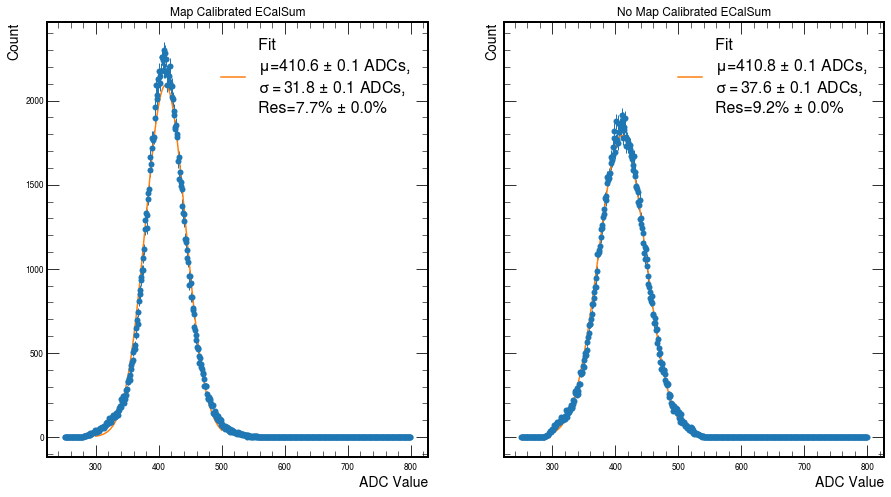

In [47]:
fig, axs = plt.subplots(1, 2, figsize=(15, 8), sharey = True)

lowRange = 250
highRange = 800
bins = highRange - lowRange
lowFit = 300
highFit = 500
x_pos = 25/2
y_pos = 25/2
width = 500

posmask = (calix_reco > (x_pos - width)) & (calix_reco < (x_pos + width)) & (caliy_reco > (y_pos - width)) & (caliy_reco < (y_pos + width))

h, bins = np.histogram(map_caliEvtSum[posmask], bins=bins, range=(lowRange,highRange))
bin_centers = 0.5 * (bins[:-1] + bins[1:])
errors = np.sqrt(h)
axs[0].errorbar(bin_centers, h, yerr=errors, fmt='o', ecolor='tab:blue', color='tab:blue',
                      capsize=0, elinewidth=1, markeredgewidth=0)


mask = (h > 0) & (bin_centers > lowFit) & (bin_centers < highFit)

initial_params = [max(h[mask]),np.mean(map_caliEvtSum[caliEvtSum > lowFit]),np.std(map_caliEvtSum[caliEvtSum > lowFit])]

m = Minuit(LeastSquares(bin_centers[mask], h[mask], errors[mask], gauss), A=initial_params[0], mu=initial_params[1], sigma=initial_params[2])
m.limits["sigma"] = (0, None)
m.migrad()
fitted_params = m.values
errors = m.errors
A_fit = fitted_params['A']
mu_fit = fitted_params['mu']
sigma_fit = fitted_params['sigma']
A_err = errors['A']
mu_err = errors['mu']
sigma_err = errors['sigma']
x = np.linspace(lowFit, highFit, 2000)
y_fit = gauss(x, A_fit, mu_fit, sigma_fit)
res = np.sqrt((100*res)**2 - 1.8**2)
# Step 1: Calculate r and its error
r = sigma_fit / mu_fit
delta_r = r * np.sqrt((sigma_err / sigma_fit)**2 + (mu_err / mu_fit)**2)
# Step 2: Calculate s and its error
s = 100 * r
delta_s = 100 * delta_r
# Step 3: Calculate res and its error
res = np.sqrt(s**2 - 1.8**2)
delta_res = (s / np.sqrt(s**2 - 1.8**2)) * delta_s

x = np.linspace(lowFit, highFit, 1500)
y_fit = gauss(x, A_fit, mu_fit, sigma_fit)
res = 100 * sigma_fit/mu_fit

axs[0].plot(x, y_fit, 'tab:orange', label='Fit \n$\mu$=%2.1f ± %2.1f ADCs, \n$\sigma=$%2.1f ± %2.1f ADCs, \nRes=%2.1f%% ± %2.1f%%'%(mu_fit, mu_err, sigma_fit, sigma_err, res, delta_res))
axs[0].legend(loc='upper right', fontsize=16)   

print("Mean: " + str(mu_fit))
print("Mean Error: " + str(mu_err))
print("Resolution: " + str(res))
print("Resolution Error: " + str(delta_res))

caliElectronMean = mu_fit
axs[0].set_title("Map Calibrated ECalSum")
axs[0].set_xlabel("ADC Value", fontsize = 14)
axs[0].set_ylabel("Count", fontsize = 14)


h, bins = np.histogram(caliEvtSum[posmask], bins=bins, range=(lowRange,highRange))
bin_centers = 0.5 * (bins[:-1] + bins[1:])
errors = np.sqrt(h)
axs[1].errorbar(bin_centers, h, yerr=errors, fmt='o', ecolor='tab:blue', color='tab:blue',
                      capsize=0, elinewidth=1, markeredgewidth=0)


mask = (h > 0) & (bin_centers > lowFit) & (bin_centers < highFit)

initial_params = [max(h[mask]),np.mean(caliEvtSum[caliEvtSum > lowFit]),np.std(caliEvtSum[caliEvtSum > lowFit])]

m = Minuit(LeastSquares(bin_centers[mask], h[mask], errors[mask], gauss), A=initial_params[0], mu=initial_params[1], sigma=initial_params[2])
m.limits["sigma"] = (0, None)
m.migrad()
fitted_params = m.values
errors = m.errors
A_fit = fitted_params['A']
mu_fit = fitted_params['mu']
sigma_fit = fitted_params['sigma']
A_err = errors['A']
mu_err = errors['mu']
sigma_err = errors['sigma']
x = np.linspace(lowFit, highFit, 2000)
y_fit = gauss(x, A_fit, mu_fit, sigma_fit)
res = np.sqrt((100*res)**2 - 1.8**2)
# Step 1: Calculate r and its error
r = sigma_fit / mu_fit
delta_r = r * np.sqrt((sigma_err / sigma_fit)**2 + (mu_err / mu_fit)**2)
# Step 2: Calculate s and its error
s = 100 * r
delta_s = 100 * delta_r
# Step 3: Calculate res and its error
res = np.sqrt(s**2 - 1.8**2)
delta_res = (s / np.sqrt(s**2 - 1.8**2)) * delta_s

x = np.linspace(lowFit, highFit, 1500)
y_fit = gauss(x, A_fit, mu_fit, sigma_fit)
res = 100 * sigma_fit/mu_fit

axs[1].plot(x, y_fit, 'tab:orange', label='Fit \n$\mu$=%2.1f ± %2.1f ADCs, \n$\sigma=$%2.1f ± %2.1f ADCs, \nRes=%2.1f%% ± %2.1f%%'%(mu_fit, mu_err, sigma_fit, sigma_err, res, delta_res))
axs[1].legend(loc='upper right', fontsize=16)   

caliElectronMean = mu_fit
axs[1].set_title("No Map Calibrated ECalSum")
axs[1].set_xlabel("ADC Value", fontsize = 14)
axs[1].set_ylabel("Count", fontsize = 14)